# This script is intended to find out how TMS modulate CMMN
We have three group, lf-TMS, hf-TMS, sham, we also have push/pull

# Section 1: fc writing

In [1]:
from itertools import count
import matplotlib,numpy as np
import matplotlib.cm as cm


class bold_color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

class EEGChannel:
    '''innitilized by info chs'''
    _ids = count(0)
    
    def __init__(self, x, y,name="None"):
        self.id = next(self._ids)
        self.x = x
        self.y = y
        self.name = name
    def plot(self,ax,center):
        circle = plt.Circle((center[0]+self.x, center[1]+self.y), radius=0.2,fill = True)
        ax.add_patch(circle)
        label = ax.annotate(self.name, xy=(center[0]+self.x, center[1]+self.y), fontsize=18, ha="center")
        return ax 

    
class EMGChannel:
    '''with polar coordinates as inputs'''
    
    _ids = count(0)
    
    def __init__(self, rho, phi,name="None"):
        self.id = next(self._ids)
        self.rho = rho
        self.phi = phi
        self.name = name
        self.x = rho * np.cos(phi/180*np.pi)
        self.y = rho * np.sin(phi/180*np.pi)
        
    def plot(self,ax,center):
        circle = plt.Circle((center[0]+self.x, center[1]+self.y), radius=0.2,fill = True)
        ax.add_patch(circle)
        label = ax.annotate(self.name, xy=(center[0]+self.x, center[1]+self.y), fontsize=18, ha="center")
        return ax        
    
    def cartesianC(self):
        return(self.x, self.y)
    
    def polarC(self):
        return(self.rho,self.phi)

# EMG Topograph_basis
def plotTopoEMG(EMGs,ax,center=[7,0]):
    for i in range(2):
        circle = plt.Circle((center[0],center[1]), 2*(i+1),fill = False)
        ax.add_artist(circle)
    for EMG in EMGs:
        ax = EMG.plot(ax,center)
    return ax

def plotTopoEEG(EEGs,ax,center=[-5,0],radius=6):
    circle = plt.Circle((center[0],center[1]),radius,fill = False)
    ax.plot()
    ax.plot([center[0]-0.5,center[0]],[radius+center[1],radius+center[1]+1])
    ax.plot([center[0]+0.5,center[0]],[radius+center[1],radius+center[1]+1])
    ax.add_artist(circle)
    for EEG in EEGs:
        ax = EEG.plot(ax,center)
    return ax    
    
def c_map(data):
    '''
    data should be numpy array (adj_m, for example)
    '''
    minima = np.min(data[np.nonzero(data)])
    maxima = np.max(data)
    if minima==maxima:
        minima-=0.2
        maxima+=0.2
    norm = matplotlib.colors.Normalize(vmin=minima,vmax=maxima,clip=True)
#     mapper = cm.ScalarMappable(norm=norm,cmap=cm.viridis)
    mapper = cm.ScalarMappable(norm=norm,cmap="bwr")
    return mapper

def c_map_bwr(data):
    '''
    data should be numpy array (adj_m, for example)
    '''
    minima = np.min(data[np.nonzero(data)])
    maxima = np.max(data)
    if minima==maxima:
        minima-=0.2
        maxima+=0.2
    boundary = (np.abs(maxima)+np.abs(minima))
    norm = matplotlib.colors.Normalize(vmin=-boundary,vmax=boundary,clip=True)
#     mapper = cm.ScalarMappable(norm=norm,cmap=cm.viridis)
    mapper = cm.ScalarMappable(norm=norm,cmap="bwr")
    return mapper

def graph_plot(adj_m,fig,ax,ignore_zero=True,center_EEG=[-5,0],center_EMG=[7,0]):
    mapper = c_map(adj_m)
    if ignore_zero==True:
        for ix,iy in np.ndindex(adj_m.shape):
            if -0.1<adj_m[ix,iy]<0.1:
                pass
            else:
                if ix>31:
                    if iy>31:
                        ax.plot([EMGs[ix-32].x+center_EMG[0], EMGs[iy-32].x+center_EMG[0]],
                                [EMGs[ix-32].y+center_EMG[1], EMGs[iy-32].y+center_EMG[1]],
                                color = mapper.to_rgba(adj_m[ix,iy]))
                    else:
                        ax.plot([EMGs[ix-32].x+center_EMG[0], EEGs[iy].x+center_EEG[0]],
                                [EMGs[ix-32].y+center_EMG[1], EEGs[iy].y+center_EEG[1]],
                               color = mapper.to_rgba(adj_m[ix,iy]))
                else:
                    if iy>31:
                        ax.plot([EEGs[ix].x+center_EEG[0], EMGs[iy-32].x+center_EMG[0]],
                                [EEGs[ix].y+center_EEG[1], EMGs[iy-32].y+center_EMG[1]],
                               color = mapper.to_rgba(adj_m[ix,iy]))
                    else:
                        ax.plot([EEGs[ix].x+center_EEG[0], EEGs[iy].x+center_EEG[0]],
                                [EEGs[ix].y+center_EEG[1], EEGs[iy].y+center_EEG[1]],
                               color = mapper.to_rgba(adj_m[ix,iy]))
    fig.colorbar(mapper,ax=ax)
    return fig,ax

def graph_plot_fixMapper(adj_m,adj_m_fix,fig,ax,ignore_zero=True,center_EEG=[-5,0],center_EMG=[7,0]):
    # the colorbar of the output plot only depends on adj_m_fix
    mapper = c_map_bwr(adj_m_fix)
    if ignore_zero==True:
        for ix,iy in np.ndindex(adj_m.shape):
            if -0.1<adj_m[ix,iy]<0.1:
                pass
            else:
                if ix>31:
                    if iy>31:
                        ax.plot([EMGs[ix-32].x+center_EMG[0], EMGs[iy-32].x+center_EMG[0]],
                                [EMGs[ix-32].y+center_EMG[1], EMGs[iy-32].y+center_EMG[1]],
                                color = mapper.to_rgba(adj_m[ix,iy]))
                    else:
                        ax.plot([EMGs[ix-32].x+center_EMG[0], EEGs[iy].x+center_EEG[0]],
                                [EMGs[ix-32].y+center_EMG[1], EEGs[iy].y+center_EEG[1]],
                               color = mapper.to_rgba(adj_m[ix,iy]))
                else:
                    if iy>31:
                        ax.plot([EEGs[ix].x+center_EEG[0], EMGs[iy-32].x+center_EMG[0]],
                                [EEGs[ix].y+center_EEG[1], EMGs[iy-32].y+center_EMG[1]],
                               color = mapper.to_rgba(adj_m[ix,iy]))
                    else:
                        ax.plot([EEGs[ix].x+center_EEG[0], EEGs[iy].x+center_EEG[0]],
                                [EEGs[ix].y+center_EEG[1], EEGs[iy].y+center_EEG[1]],
                               color = mapper.to_rgba(adj_m[ix,iy]))
    fig.colorbar(mapper,ax=ax)
    return fig,ax

# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from statannot import add_stat_annotation
from itertools import count
import os, mne, warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


# calculate the Cohen's d between two samples
from numpy.random import randn
from numpy.random import seed
from numpy import mean
from numpy import var
from math import sqrt

# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    u1, u2 = mean(d1), mean(d2)
    return (u1 - u2) / s


    
chs_list_preImage_lParetic = ['Fp1','AF3','F3','F7','FC1','FC5','C3','T7','CP1','CP5','P3','P7','PO3','O1',
                              'Fz','Cz','Pz','Oz',
                   'Fp2','AF4','F4','F8','FC2','FC6','C4','T8','CP2','CP6','P4','P8','PO4','O2',
                             'emg1','emg2','emg3','emg4','emg5','emg6','emg7','emg8']

chs_list_preImage_rParetic = ['Fp2','AF4','F4','F8','FC2','FC6','C4','T8','CP2','CP6','P4','P8','PO4','O2',
                              'Fz','Cz','Pz','Oz',
                   'Fp1','AF3','F3','F7','FC1','FC5','C3','T7','CP1','CP5','P3','P7','PO3','O1',
                             'emg1','emg2','emg3','emg4','emg5','emg6','emg7','emg8']

chs_list_image = ['Fp1i','AF3i','F3i','F7i','FC1i','FC5i','C3i','T7i','CP1i','CP5i','P3i','P7i','PO3i','O1i',
                      'Fz','Cz','Pz','Oz',
                       'Fp1c','AF3c','F3c','F7c','FC1c','FC5c','C3c','T7c','CP1c','CP5c','P3c','P7c','PO3c','O1c',
                      'FDS','FCU','FCR','ECU','ECRL','BBS','TBL','LD']


################## Dataset Loading ##################
data_dir = 'E:/masterSJTU/MultiEEGEMG_stroke/'
global_results_dir = os.path.join(data_dir,'results')
if not os.path.exists(global_results_dir):
    os.makedirs(global_results_dir)
iVC_results_dir = os.path.join(data_dir,'results','iVC')
iVC_TMS_results_dir = os.path.join(data_dir,'results','iVC_TMS')
if not os.path.exists(iVC_results_dir):
    os.makedirs(iVC_results_dir)
if not os.path.exists(iVC_TMS_results_dir):
    os.makedirs(iVC_TMS_results_dir)
# data_dir = 'E:/important file/Projects/CM-graph/sample_data' #PC dir
subj_idx = '3'
contraction_type = 'iVC'
session_idx = 's01'
subjInfo_fName = os.path.join(data_dir,'subj_info.txt')
subjInfo = pd.read_csv(subjInfo_fName, skiprows=0,
                       sep = ',',engine = 'python')
affected_h = subjInfo[subjInfo['subj_idx']==int(subj_idx)]['affected_h'].values[0]
epochs_hybrid_dir = os.path.join(data_dir,'subj'+subj_idx,'epochs_hybrid')
epochs_hybrid_fName = os.path.join(data_dir,'subj'+subj_idx,'epochs_hybrid',
                                      'subj'+subj_idx+'_'+contraction_type+'_pull_be4TMS_epo.fif')
epochs_hybrid = mne.read_epochs(epochs_hybrid_fName,preload=True)

EMGs=[EMGChannel(2,150,'FDS'),EMGChannel(2,170,'FCU'),EMGChannel(2, 240,'FCR'),EMGChannel(2,350,'ECU'),
      EMGChannel(2, 80,'ECRL'),EMGChannel(4,140,'BBS'),EMGChannel(4, 310,'TBL'),
      EMGChannel(4,90,'LD')]

EEGs = [EEGChannel(x=epochs_hybrid.info['chs'][epochs_hybrid.info['ch_names'].index(chs_list_preImage_rParetic[chs_list_image.index(ch)])]['loc'][0]*50,
           y=epochs_hybrid.info['chs'][epochs_hybrid.info['ch_names'].index(chs_list_preImage_rParetic[chs_list_image.index(ch)])]['loc'][1]*50,
           name=ch) for ch in chs_list_image[:32]]  

Reading E:/masterSJTU/MultiEEGEMG_stroke/subj3\epochs_hybrid\subj3_iVC_pull_be4TMS_epo.fif ...
    Found the data of interest:
        t =       0.00 ...    3000.00 ms
        0 CTF compensation matrices available
Not setting metadata
Not setting metadata
37 matching events found
No baseline correction applied
0 projection items activated


# Section 2: Create Dataframe
patient group = \[hTMS,lTMS,sham\]
session group = \[before, after\]
contraction group = \[push, pull\]

In [2]:
import os, pandas as pd, numpy as np
# definition
n_chs = 40
cV_ratio = 5
n_SPMIs = int((n_chs*n_chs-n_chs)/2)


patient_groups = {'lTMS':['3','6','8','11','31','33','40'],
                  'hTMS':['22','23','26','28','29','38','41'],
                  'sham':['37','36','12','16','44','45','50']}

# data_dir = 'E:/important file/Projects/CM-graph/sample_data' #PC dir
contraction_type = 'iVC'
subj_infofName = os.path.join(data_dir,'subj_info.txt')   
subj_info_df = pd.read_csv(subj_infofName, delimiter = ",")
    
# df generation
df_colNames = ['subj_id','patient_group','FMA','bs_UE','session_group','contraction_group']
for ch1_idx in range(n_chs):
    for ch2_idx in np.arange(ch1_idx+1,n_chs):
        ch1_name = chs_list_image[ch1_idx]
        ch2_name = chs_list_image[ch2_idx]
        df_colNames.append('SPMI'+'_'+ch1_name+'_'+ch2_name)
df_gProperties_fName = os.path.join(data_dir,'subj3','temp','subj3iVC_gProperties_push_be4TMS.csv')
df_gProperties = pd.read_csv(df_gProperties_fName, skiprows=0,sep = ',',engine = 'python')
df_colNames+=df_gProperties.columns.tolist()

df_data = None
for patient_group in patient_groups.keys():
    for subj in patient_groups[patient_group]:
        temp_dir = os.path.join(data_dir,'subj'+subj,'temp')
        for contraction_group in ['push','pull']:
            for session_group in ['be4TMS','afterTMS']:
                SPMI_withoutD_z_fName = os.path.join(temp_dir,contraction_type+'_z_SPMI_'+contraction_group+'_'+session_group)
                SPMI_withoutD_z = np.load(SPMI_withoutD_z_fName+'.npy')
                df_gProperties_fName = os.path.join(temp_dir,'subj'+subj+contraction_type+'_gProperties_'+contraction_group+'_'+session_group+'.csv')
                df_gProperties = pd.read_csv(df_gProperties_fName, skiprows=0,sep = ',',engine = 'python')
                df_SPMI_data = []
                FMA = subj_info_df.loc[subj_info_df['subj_idx']==int(subj),'FMA'].values[0].split('_')[0]
                bs_UE = subj_info_df.loc[subj_info_df['subj_idx']==int(subj),'Brunnstrom_UE'].values[0]
                for ch1_idx in range(n_chs):
                    for ch2_idx in np.arange(ch1_idx+1,n_chs):
                        ch1_name = chs_list_image[ch1_idx]
                        ch2_name = chs_list_image[ch2_idx]
                        df_SPMI_data.append(SPMI_withoutD_z[ch1_idx,ch2_idx])
                if df_data is None:
                    df_data = np.array([subj,str(patient_group),FMA,bs_UE,session_group,contraction_group]+df_SPMI_data+df_gProperties.iloc[0].values.tolist())
                else:
                    df_data = np.vstack((df_data,np.array([subj,str(patient_group),FMA,bs_UE,session_group,
                                                           contraction_group]+df_SPMI_data+df_gProperties.iloc[0].values.tolist())))
df = pd.DataFrame (df_data, columns = df_colNames)        
# manipulate data
df['FMA']=df['FMA'].astype(float)
df['sw_omega']=np.abs(df['sw_omega'].astype(float)) #sw_interpretation
df.iloc[:,6:6+n_SPMIs] = df.iloc[:,6:6+n_SPMIs].astype(float)
#Conversion to EMG names

local_measure_types = ['eigenvector_centrality','closeness_centrality','degree_centrality','betweenness_centrality','betweenness_centrality_weight','closeness_centrality_weight',
                        'clusteringC_weight','closeness_vitality','closeness_vitality_weight','ecc_weight','cost_ecc_weight',
                       'cost_betweenness_centrality_weight','cost_eigenvector_centrality_weight','cost_closeness_centrality_weight',
                          'cost_closeness_vitality_weight']

convertion_dict = {'emg1':'FDS','emg2':'FCU','emg3':'FCR','emg4':'ECU','emg5':'ECRL','emg6':'BBS','emg7':'TBL','emg8':'LD'}
for local_measure_type in local_measure_types:
    for emg_idx in convertion_dict.keys():
        df = df.rename(columns={emg_idx+'_'+local_measure_type: convertion_dict[emg_idx]+'_'+local_measure_type})
        

measuresContaining_inf = ['_closeness_vitality','_closeness_vitality_weight','_cost_closeness_vitality_weight']
for ch in chs_list_image:
    for measure in measuresContaining_inf:
        df[ch+measure] = df[ch+measure].astype(float)
        df[ch+measure].replace(-np.inf,np.nan, inplace = True)
        df[ch+measure].replace(np.nan,-df[ch+measure].mean()*cV_ratio, inplace = True)

        

df_fName = os.path.join(iVC_results_dir,'patients_TMS_df.csv')
df.to_csv(df_fName)
df_push = df.query('contraction_group=="push"')
df_pull = df.query('contraction_group=="pull"')

# Section 3: Statistical analyses on components and visualization of topograph- push (as the movement effect has been shown)
## Section 3-1: Mixed ANOVA+Tukey+paired T-test -push

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: SPMI_AF3i_F3i
Normality - be4TMS: False, Normality - afterTMS: False
Normality - lTMS: True, Normality - hTMS: False, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source               SS    DF1    DF2       MS       F    p-unc     np2       eps
-------------  --------  -----  -----  -------  ------  -------  ------  --------
patient_group  170.8224      2     18  85.4112  6.4000   0.0080  0.4156  nan
session_group   15.7649      1     18  15.7649  0.9671   0.3384  0.0510    1.0000
Interaction     20.2322      2     18  10.1161  0.6206   0.5487  0.0645  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     1.6884     6.5884  -4.9000  1.5818  -3.0977     0.0162   -1.5501
hTMS  sham     1.6884     2.4878  -0.7995  1.5818  -0.5054     0.8635   -0.25

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: SPMI_F3i_C3i
Normality - be4TMS: True, Normality - afterTMS: False
Normality - lTMS: True, Normality - hTMS: False, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source              SS    DF1    DF2       MS       F    p-unc     np2       eps
-------------  -------  -----  -----  -------  ------  -------  ------  --------
patient_group  73.1244      2     18  36.5622  4.3245   0.0293  0.3246  nan
session_group   9.2209      1     18   9.2209  0.8439   0.3704  0.0448    1.0000
Interaction    19.8944      2     18   9.9472  0.9104   0.4201  0.0919  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     2.7144     5.3190  -2.6046  1.1650  -2.2356     0.0919   -1.1187
hTMS  sham     2.7144     1.9677   0.7467  1.1650   0.6410     0.7866    0.3207
lTM

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: SPMI_F3i_FCR
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  1.5532      2     18  0.7766  5.3662   0.0149  0.3735  nan
session_group  0.0020      1     18  0.0020  0.0071   0.9339  0.0004    1.0000
Interaction    0.5403      2     18  0.2701  0.9776   0.3953  0.0980  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS    -0.0797     0.2159  -0.2955  0.2543  -1.1620     0.4913   -0.5815
hTMS  sham    -0.0797     0.6321  -0.7118  0.2543  -2.7986     0.0303   -1.4004
lTMS  sham     0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: SPMI_F7i_T7c
Normality - be4TMS: False, Normality - afterTMS: False
Normality - lTMS: False, Normality - hTMS: True, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source               SS    DF1    DF2       MS       F    p-unc     np2       eps
-------------  --------  -----  -----  -------  ------  -------  ------  --------
patient_group    1.6956      2     18   0.8478  0.0416   0.9594  0.0046  nan
session_group    1.0266      1     18   1.0266  0.0555   0.8164  0.0031    1.0000
Interaction    143.9203      2     18  71.9601  3.8917   0.0394  0.3019  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     7.3253     2.5210   4.8043  1.8023   2.6656     0.0398    1.3339
hTMS  sham     7.3253     4.0432   3.2821  1.8023   1.8210     0.1910    0.9112

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: SPMI_F7i_ECRL
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.6529      2     18  0.3264  0.8966   0.4254  0.0906  nan
session_group  0.4461      1     18  0.4461  2.0640   0.1680  0.1029    1.0000
Interaction    1.5793      2     18  0.7897  3.6538   0.0466  0.2888  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)    diff      se       T    p-tukey    hedges
----  ----  ---------  ---------  ------  ------  ------  ---------  --------
hTMS  lTMS     0.3995     0.3416  0.0580  0.2398  0.2417     0.9000    0.1210
hTMS  sham     0.3995    -0.0676  0.4671  0.2398  1.9476     0.1542    0.9746
lTMS  sham     0.3416    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: SPMI_FC1i_C3i
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source              SS    DF1    DF2       MS       F    p-unc     np2       eps
-------------  -------  -----  -----  -------  ------  -------  ------  --------
patient_group  70.2556      2     18  35.1278  3.9036   0.0391  0.3025  nan
session_group   0.0018      1     18   0.0018  0.0002   0.9885  0.0000    1.0000
Interaction    25.2758      2     18  12.6379  1.4634   0.2577  0.1399  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     3.1098     6.3623  -3.2525  1.3508  -2.4079     0.0662   -1.2049
hTMS  sham     3.1098     2.3090   0.8009  1.3508   0.5929     0.8139    0.2967
lTMS 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: SPMI_FC1i_FCU
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.4974      2     18  0.2487  0.8189   0.4567  0.0834  nan
session_group  0.0568      1     18  0.0568  0.5426   0.4709  0.0293    1.0000
Interaction    1.4452      2     18  0.7226  6.9049   0.0059  0.4341  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS    -0.0236     0.4910  -0.5146  0.2262  -2.2751     0.0854   -1.1385
hTMS  sham    -0.0236    -0.2016   0.1780  0.2262   0.7871     0.7038    0.3939
lTMS  sham     0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


sessionE: SPMI_FC5i_ECU
Normality - be4TMS: True, Normality - afterTMS: False
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  2.5725      2     18  1.2862  0.9888   0.3914  0.0990  nan
session_group  2.2016      1     18  2.2016  6.0976   0.0238  0.2530    1.0000
Interaction    1.2980      2     18  0.6490  1.7975   0.1942  0.1665  nan

lTMS: after vs (-) be4 (paired ttest)

POST HOC TESTS

Contrast       A         B       Paired    Parametric          T     dof  Tail         p-unc    BF10    hedges
-------------  --------  ------  --------  ------------  -------  ------  ---------  -------  ------  --------
session_group  afterTMS  be4TMS  True      True          -0.1232  6.0000  two-sided   2.7180  0.3550  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


sessionE: SPMI_T7i_LD
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.4018      2     18  0.2009  0.2819   0.7576  0.0304  nan
session_group  1.8546      1     18  1.8546  5.6812   0.0284  0.2399    1.0000
Interaction    0.9716      2     18  0.4858  1.4882   0.2523  0.1419  nan

lTMS: after vs (-) be4 (paired ttest)

POST HOC TESTS

Contrast       A         B       Paired    Parametric          T     dof  Tail         p-unc    BF10    hedges
-------------  --------  ------  --------  ------------  -------  ------  ---------  -------  ------  --------
session_group  afterTMS  be4TMS  True      True          -3.4218  6.0000  two-sided   0.0423  5.1520   -0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: SPMI_P3i_TBL
Normality - be4TMS: False, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: False, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  4.2191      2     18  2.1095  3.7961   0.0421  0.2967  nan
session_group  1.0326      1     18  1.0326  2.7742   0.1131  0.1335    1.0000
Interaction    1.3054      2     18  0.6527  1.7535   0.2015  0.1631  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS    -0.0290     0.0215  -0.0505  0.3930  -0.1285     0.9000   -0.0643
hTMS  sham    -0.0290     1.0321  -1.0611  0.3930  -2.6997     0.0371   -1.3510
lTMS  sham    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: SPMI_PO3i_O1i
Normality - be4TMS: False, Normality - afterTMS: False
Normality - lTMS: False, Normality - hTMS: False, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source               SS    DF1    DF2        MS       F    p-unc     np2       eps
-------------  --------  -----  -----  --------  ------  -------  ------  --------
patient_group  233.2461      2     18  116.6230  3.7134   0.0447  0.2921  nan
session_group   83.4853      1     18   83.4853  2.4278   0.1366  0.1188    1.0000
Interaction    208.6860      2     18  104.3430  3.0344   0.0732  0.2521  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)    diff      se       T    p-tukey    hedges
----  ----  ---------  ---------  ------  ------  ------  ---------  --------
hTMS  lTMS     5.4143     4.1079  1.3064  1.2704  1.0283     0.5671    0.5145
hTMS  sham     5.4143     2.0155  3.3988  1.2704  2.6753     0.0390    1.338

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: SPMI_Fz_AF3c
Normality - be4TMS: False, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: False

ANOVA SUMMARY

Source              SS    DF1    DF2       MS       F    p-unc     np2       eps
-------------  -------  -----  -----  -------  ------  -------  ------  --------
patient_group  57.3448      2     18  28.6724  3.6319   0.0473  0.2875  nan
session_group   5.9086      1     18   5.9086  1.5298   0.2320  0.0783    1.0000
Interaction    11.7979      2     18   5.8989  1.5272   0.2440  0.1451  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     2.4872     5.4872  -3.0001  1.4238  -2.1071     0.1164   -1.0544
hTMS  sham     2.4872     1.4931   0.9940  1.4238   0.6982     0.7542    0.3494
lTMS

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: SPMI_Oz_FCR
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  3.4549      2     18  1.7274  6.6579   0.0068  0.4252  nan
session_group  0.3070      1     18  0.3070  1.1728   0.2931  0.0612    1.0000
Interaction    0.8274      2     18  0.4137  1.5805   0.2331  0.1494  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS    -0.3278     0.6570  -0.9848  0.2171  -4.5368     0.0010   -2.2702
hTMS  sham    -0.3278     0.4390  -0.7667  0.2171  -3.5323     0.0064   -1.7676
lTMS  sham     0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


sessionE: SPMI_Oz_BBS
Normality - be4TMS: True, Normality - afterTMS: False
Normality - lTMS: False, Normality - hTMS: False, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.2759      2     18  0.1380  0.1673   0.8472  0.0183  nan
session_group  1.1958      1     18  1.1958  6.8140   0.0177  0.2746    1.0000
Interaction    0.5572      2     18  0.2786  1.5875   0.2318  0.1499  nan

lTMS: after vs (-) be4 (paired ttest)

POST HOC TESTS

Contrast       A         B       Paired    Parametric          T     dof  Tail         p-unc    BF10    hedges
-------------  --------  ------  --------  ------------  -------  ------  ---------  -------  ------  --------
session_group  afterTMS  be4TMS  True      True          -0.0938  6.0000  two-sided   2.7849  0.3550   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: SPMI_F3c_FCR
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: False, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  3.4746      2     18  1.7373  4.0041   0.0364  0.3079  nan
session_group  0.0578      1     18  0.0578  0.1547   0.6987  0.0085    1.0000
Interaction    1.2486      2     18  0.6243  1.6703   0.2161  0.1565  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     0.0951    -0.2565   0.3515  0.3162   1.1116     0.5199    0.5562
hTMS  sham     0.0951     0.8208  -0.7257  0.3162  -2.2948     0.0823   -1.1483
lTMS  sham    -

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


sessionE: SPMI_F7c_LD
Normality - be4TMS: True, Normality - afterTMS: False
Normality - lTMS: True, Normality - hTMS: False, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  1.0224      2     18  0.5112  0.8056   0.4623  0.0822  nan
session_group  2.9374      1     18  2.9374  7.0245   0.0163  0.2807    1.0000
Interaction    0.0089      2     18  0.0045  0.0107   0.9894  0.0012  nan

lTMS: after vs (-) be4 (paired ttest)

POST HOC TESTS

Contrast       A         B       Paired    Parametric          T     dof  Tail         p-unc     BF10    hedges
-------------  --------  ------  --------  ------------  -------  ------  ---------  -------  -------  --------
session_group  afterTMS  be4TMS  True      True          -4.3418  6.0000  two-sided   0.0147  11.7500 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


sessionE: SPMI_FC1c_FCR
Normality - be4TMS: False, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.5872      2     18  0.2936  0.4105   0.6694  0.0436  nan
session_group  1.6116      1     18  1.6116  5.3619   0.0326  0.2295    1.0000
Interaction    0.3727      2     18  0.1864  0.6201   0.5490  0.0645  nan

lTMS: after vs (-) be4 (paired ttest)

POST HOC TESTS

Contrast       A         B       Paired    Parametric         T     dof  Tail         p-unc    BF10    hedges
-------------  --------  ------  --------  ------------  ------  ------  ---------  -------  ------  --------
session_group  afterTMS  be4TMS  True      True          1.0378  6.0000  two-sided   1.0182  0.5360    0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: SPMI_C3c_BBS
Normality - be4TMS: True, Normality - afterTMS: False
Normality - lTMS: False, Normality - hTMS: True, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.1860      2     18  0.0930  0.2180   0.8062  0.0237  nan
session_group  0.0000      1     18  0.0000  0.0001   0.9936  0.0000    1.0000
Interaction    3.6069      2     18  1.8034  7.8828   0.0035  0.4669  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)    diff      se       T    p-tukey    hedges
----  ----  ---------  ---------  ------  ------  ------  ---------  --------
hTMS  lTMS     0.6601     0.3818  0.2783  0.2790  0.9976     0.5845    0.4992
hTMS  sham     0.6601    -0.1516  0.8118  0.2790  2.9099     0.0241    1.4561
lTMS  sham     0.3818  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: SPMI_CP1c_LD
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: False, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.7556      2     18  0.3778  0.3614   0.7017  0.0386  nan
session_group  0.0581      1     18  0.0581  0.1984   0.6614  0.0109    1.0000
Interaction    3.9612      2     18  1.9806  6.7584   0.0065  0.4289  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     0.1962     0.5903  -0.3941  0.4715  -0.8360     0.6761   -0.4183
hTMS  sham     0.1962     0.2437  -0.0475  0.4715  -0.1007     0.9000   -0.0504
lTMS  sham     0.

C:\Users\aegea\Anaconda3\envs\p3.7\lib\site-packages\ipykernel_launcher.py:148: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


sessionE: SPMI_P3c_FCR
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: False, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.3457      2     18  0.1728  0.2929   0.7496  0.0315  nan
session_group  1.0402      1     18  1.0402  5.5030   0.0306  0.2341    1.0000
Interaction    0.3421      2     18  0.1711  0.9049   0.4222  0.0914  nan

lTMS: after vs (-) be4 (paired ttest)

POST HOC TESTS

Contrast       A         B       Paired    Parametric         T     dof  Tail         p-unc    BF10    hedges
-------------  --------  ------  --------  ------------  ------  ------  ---------  -------  ------  --------
session_group  afterTMS  be4TMS  True      True          2.2966  6.0000  two-sided   0.1842  1.7070    0.9

C:\Users\aegea\Anaconda3\envs\p3.7\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: SPMI_P7c_BBS
Normality - be4TMS: False, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  2.7273      2     18  1.3637  1.6803   0.2143  0.1573  nan
session_group  0.1806      1     18  0.1806  0.8699   0.3633  0.0461    1.0000
Interaction    1.4843      2     18  0.7422  3.5751   0.0493  0.2843  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS    -0.1533     0.8320  -0.9853  0.3697  -2.6651     0.0398   -1.3337
hTMS  sham    -0.1533     0.1744  -0.3277  0.3697  -0.8865     0.6475   -0.4436
lTMS  sham     0

C:\Users\aegea\Anaconda3\envs\p3.7\lib\site-packages\ipykernel_launcher.py:231: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\aegea\Anaconda3\envs\p3.7\lib\site-packages\ipykernel_launcher.py:261: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\aegea\Anaconda3\envs\p3.7\lib\site-packages\ipykernel_launcher.py:291: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warnin

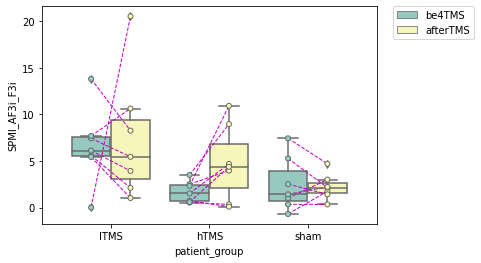

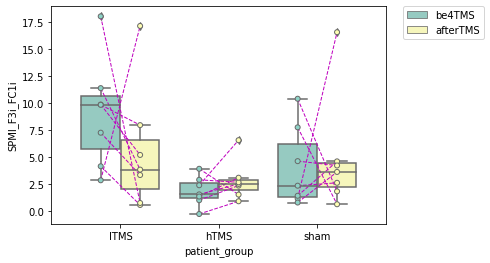

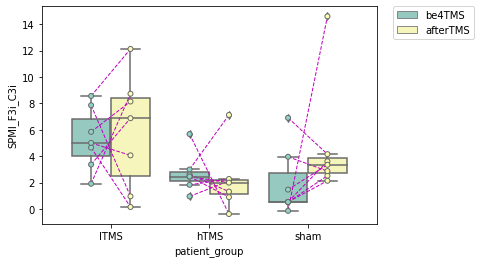

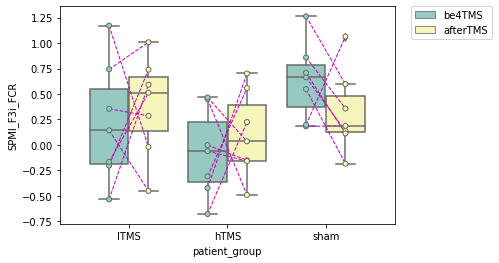

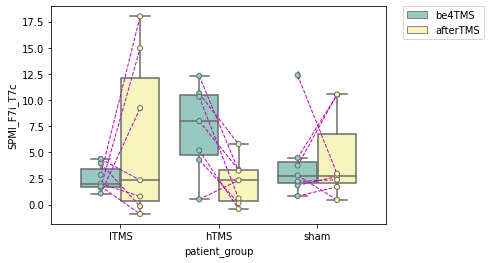

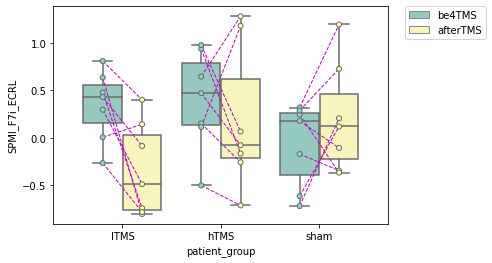

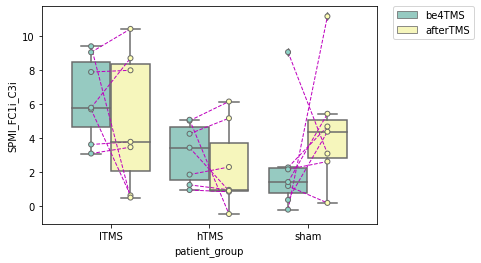

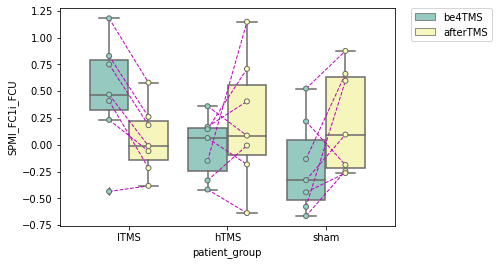

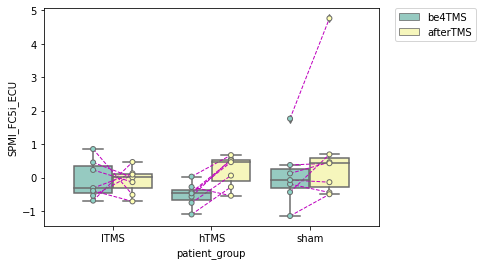

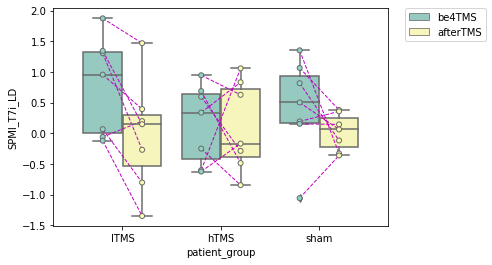

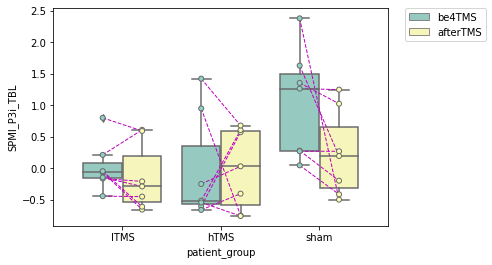

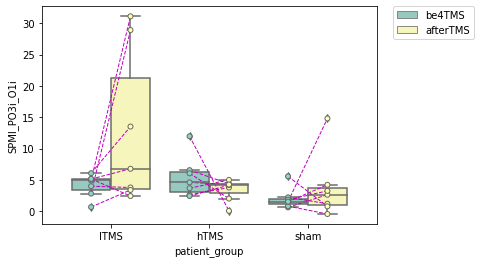

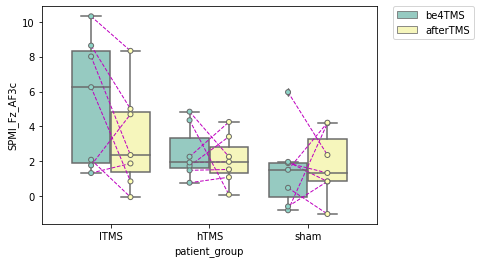

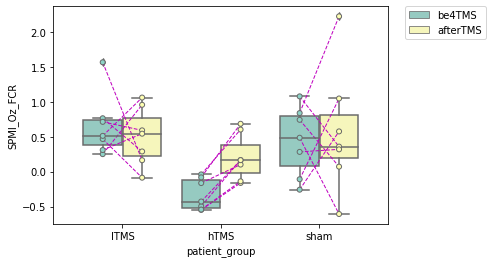

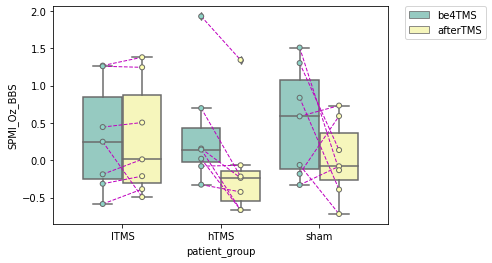

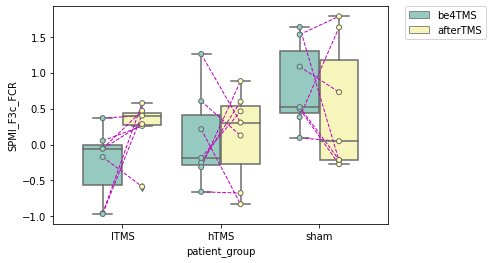

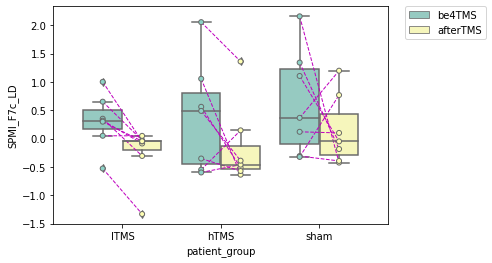

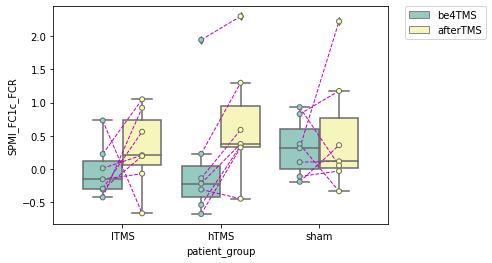

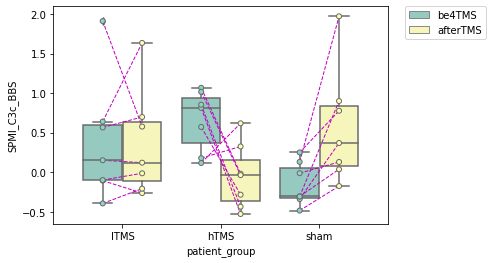

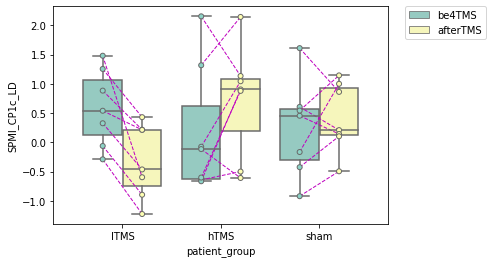

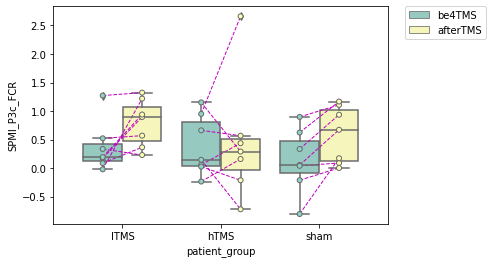

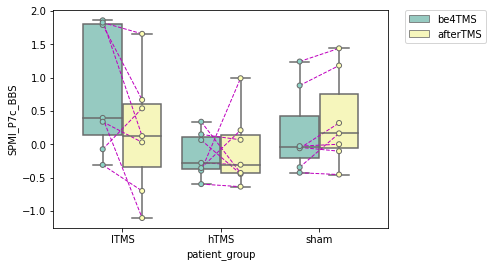

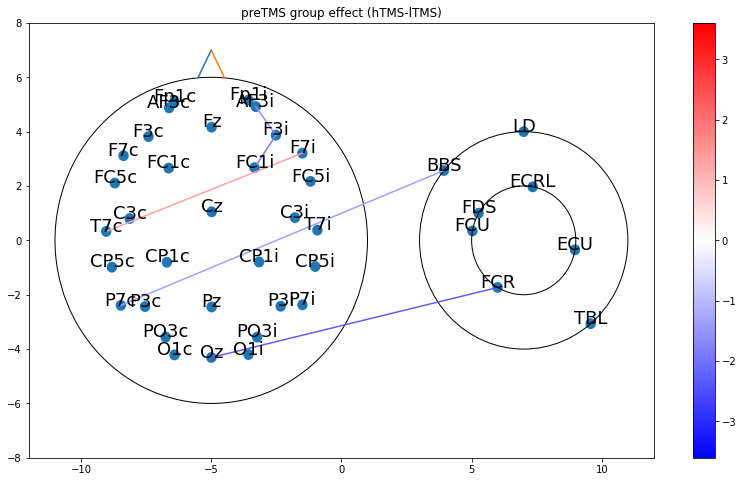

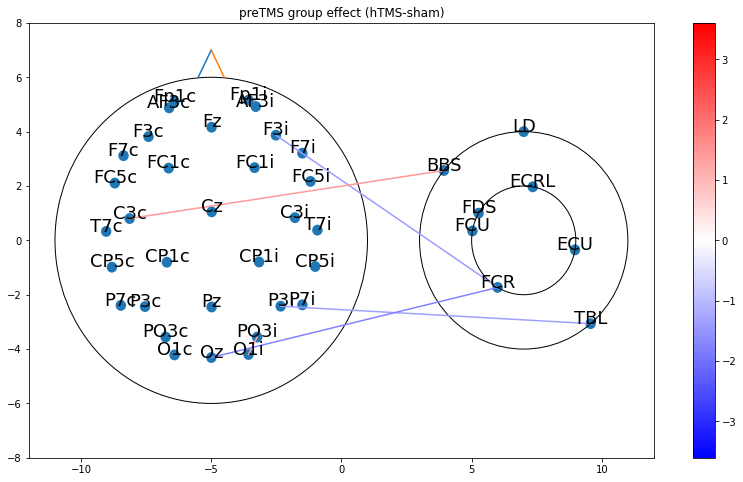

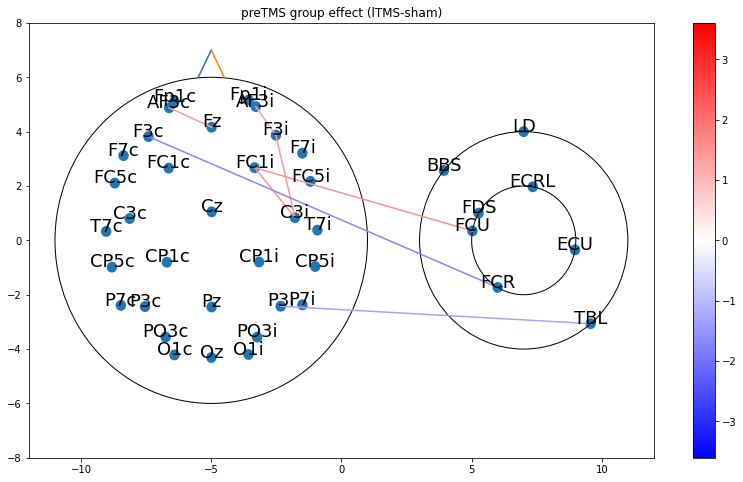

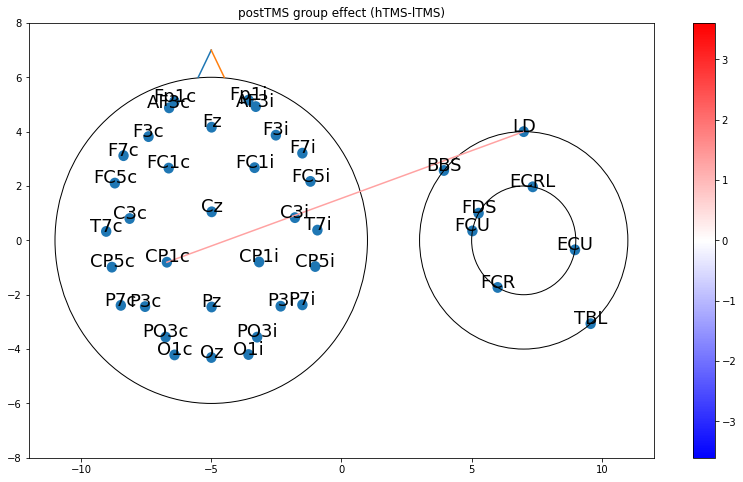

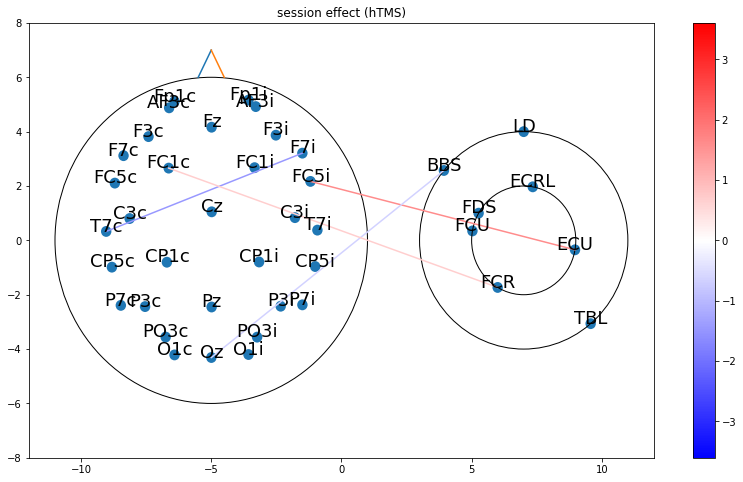

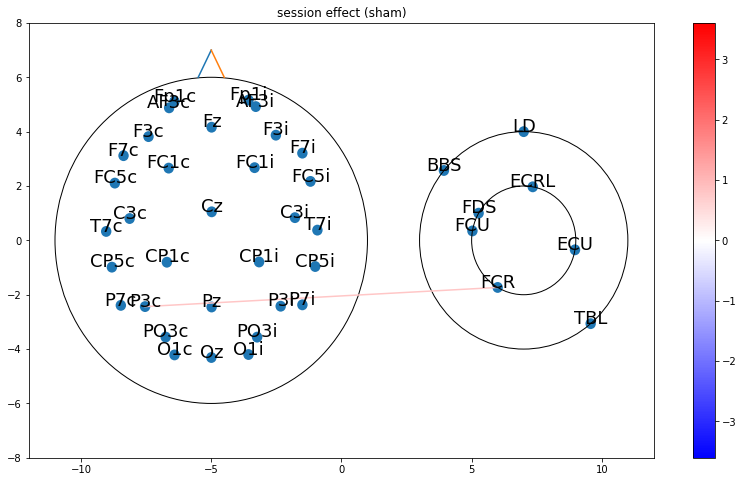

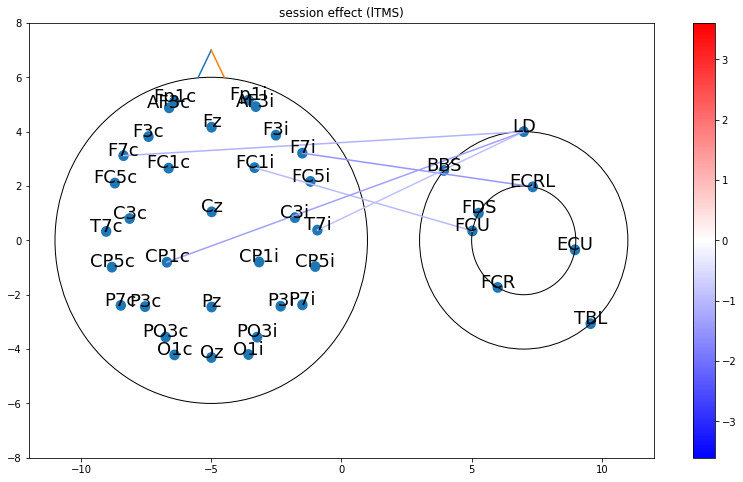

In [4]:
from bioinfokit.analys import stat
import pingouin as pg
pd.set_option('display.expand_frame_repr', False)
n_chs = 40
alpha=.05
bof_factor_ttest = 3
cons_sigDiff = []
cons_sigDiff_h_l_be4 = {}
cons_sigDiff_h_s_be4 = {}
cons_sigDiff_l_s_be4 = {}
con_sigDiff_be4 = [cons_sigDiff_h_l_be4,cons_sigDiff_h_s_be4,cons_sigDiff_l_s_be4] # must be this order
cons_sigDiff_h_l_after = {}
cons_sigDiff_h_s_after = {}
cons_sigDiff_l_s_after = {}
con_sigDiff_after = [cons_sigDiff_h_l_after,cons_sigDiff_h_s_after,cons_sigDiff_l_s_after]
lTMS_topo={}
hTMS_topo={}
sham_topo={}
res = stat()
for ch1_idx in range(n_chs):
    for ch2_idx in np.arange(ch1_idx+1,n_chs):
        ch1_name = chs_list_image[ch1_idx]
        ch2_name = chs_list_image[ch2_idx]
        res_var = 'SPMI_'+ch1_name+'_'+ch2_name
        aov = pg.mixed_anova(dv=res_var, within='session_group', between='patient_group', subject='subj_id', data=df_push)
        if aov['p-unc'].tolist()[2] < alpha: #interaction effect
            cons_sigDiff.append('SPMI_'+ch1_name+'_'+ch2_name)
            ### Post-hocs
            hsd_be4 = pg.pairwise_tukey(data=df_push.query('session_group=="be4TMS"'),dv=res_var,between = 'patient_group')
            hsd_after = pg.pairwise_tukey(data=df_push.query('session_group=="afterTMS"'),dv=res_var,between = 'patient_group')
#             hsd_be4['p-tukey'] = hsd_be4['p-tukey']*2 #there are two comparisons
#             hsd_after['p-tukey'] = hsd_after['p-tukey']*2
            ttest_session_lTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="lTMS"')).round(4)
            ttest_session_hTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="hTMS"')).round(4)
            ttest_session_sham = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="sham"')).round(4)
            ttest_session_lTMS['p-unc'] =   ttest_session_lTMS['p-unc'] *bof_factor_ttest
            ttest_session_hTMS['p-unc'] =   ttest_session_hTMS['p-unc'] *bof_factor_ttest
            ttest_session_sham['p-unc'] =   ttest_session_sham['p-unc'] *bof_factor_ttest #three comparisons
            
            ### topograph of group effect
            for i in range(3):
                if hsd_be4['p-tukey'][i] < alpha:
                    con_sigDiff_be4 [i][res_var]=hsd_be4['hedges'][i].round(4)
                if hsd_after['p-tukey'][i] < alpha:
                    con_sigDiff_after [i][res_var]=hsd_after['hedges'][i].round(4)
            
            if ttest_session_lTMS['p-unc'].values < alpha:
                lTMS_topo[res_var]=ttest_session_lTMS['hedges'].values[0].round(4)
            if ttest_session_hTMS['p-unc'].values < alpha:
                hTMS_topo[res_var]=ttest_session_hTMS['hedges'].values[0].round(4)
            if ttest_session_sham['p-unc'].values < alpha:
                sham_topo[res_var]=ttest_session_sham['hedges'].values[0].round(4)
                
            if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any() or (ttest_session_lTMS['p-unc']<alpha).any() or \
            (ttest_session_hTMS['p-unc']<alpha).any() or (ttest_session_sham['p-unc']<alpha).any():
                print('intE: ' + bold_color.BOLD+res_var+bold_color.END)
                print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_push,dv=res_var,
                                                                                               group='session_group').loc['be4TMS','normal'],
                      pg.normality(data=df_push,dv=res_var,group='session_group').loc['afterTMS','normal']))
                print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_push,dv=res_var,
                                                                                                                group='patient_group').loc['lTMS','normal'],
                                                                                                   pg.normality(data=df_push,dv=res_var,
                                                                                                                group='patient_group').loc['hTMS','normal'],
                                                                                                  pg.normality(data=df_push,dv=res_var,
                                                                                                                group='patient_group').loc['sham','normal']))
                print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                    group='session_group')['equal_var'].values[0],
                                                                                pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                    group='patient_group')['equal_var'].values[0]))
                pg.print_table(aov,floatfmt='.4f')
                print('be4: across-conditions (tukey)')
                pg.print_table(hsd_be4,floatfmt='.4f')
                print('\n')
                print('after: across-conditions (tukey)')
                pg.print_table(hsd_after,floatfmt='.4f')
                print('\n')
                print('lTMS: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_lTMS,floatfmt='.4f')
                print('\n')
                print('hTMS: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_hTMS,floatfmt='.4f')
                print('\n')
                print('sham: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_sham,floatfmt='.4f')
                plt.figure()
                ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_push, palette="Set3") 
                
                stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_push,palette="Set3",linewidth=1,dodge=True,jitter=False)
                handles, labels = stplot.get_legend_handles_labels()
                l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                for i in range(3):
                    plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                             [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',
                             linewidth=1,c='m')

                fig = ax.get_figure()
                fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_push_bp.eps'))
                continue
        elif aov['p-unc'].tolist()[1] < alpha: #session effect
            cons_sigDiff.append('SPMI_'+ch1_name+'_'+ch2_name)
            ### Post-hocs
           
            ttest_session_lTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="lTMS"')).round(4)
            ttest_session_hTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="hTMS"')).round(4)
            ttest_session_sham = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="sham"')).round(4)
            ttest_session_lTMS['p-unc'] =   ttest_session_lTMS['p-unc'] *bof_factor_ttest
            ttest_session_hTMS['p-unc'] =   ttest_session_hTMS['p-unc'] *bof_factor_ttest
            ttest_session_sham['p-unc'] =   ttest_session_sham['p-unc'] *bof_factor_ttest #three comparisons
            if ttest_session_lTMS['p-unc'].values < alpha:
                lTMS_topo[res_var]=ttest_session_lTMS['hedges'].values[0].round(4)
            if ttest_session_hTMS['p-unc'].values < alpha:
                hTMS_topo[res_var]=ttest_session_hTMS['hedges'].values[0].round(4)
            if ttest_session_sham['p-unc'].values < alpha:
                sham_topo[res_var]=ttest_session_sham['hedges'].values[0].round(4)
                
            if (ttest_session_lTMS['p-unc']<alpha).any() or \
            (ttest_session_hTMS['p-unc']<alpha).any() or (ttest_session_sham['p-unc']<alpha).any():
                print('sessionE: ' + bold_color.BOLD+res_var+bold_color.END)
                print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_push,dv=res_var,
                                                                                               group='session_group').loc['be4TMS','normal'],
                      pg.normality(data=df_push,dv=res_var,group='session_group').loc['afterTMS','normal']))
                print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_push,dv=res_var,
                                                                                                                group='patient_group').loc['lTMS','normal'],
                                                                                                   pg.normality(data=df_push,dv=res_var,
                                                                                                                group='patient_group').loc['hTMS','normal'],
                                                                                                  pg.normality(data=df_push,dv=res_var,
                                                                                                                group='patient_group').loc['sham','normal']))
                print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                    group='session_group')['equal_var'].values[0],
                                                                                pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                    group='patient_group')['equal_var'].values[0]))
                pg.print_table(aov,floatfmt='.4f')
                
                print('lTMS: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_lTMS,floatfmt='.4f')
                print('\n')
                print('hTMS: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_hTMS,floatfmt='.4f')
                print('\n')
                print('sham: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_sham,floatfmt='.4f')
                plt.figure()
                ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_push, palette="Set3") 
                
                stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_push,palette="Set3",linewidth=1,dodge=True,jitter=False)
                handles, labels = stplot.get_legend_handles_labels()
                l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                for i in range(3):
                    plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                             [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',
                             linewidth=1,c='m')

                fig = ax.get_figure()
                fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_push_bp.eps'))
                continue
        elif aov['p-unc'].tolist()[0] < alpha: #group effect
            cons_sigDiff.append('SPMI_'+ch1_name+'_'+ch2_name)
            ### Post-hocs
            hsd_be4 = pg.pairwise_tukey(data=df_push.query('session_group=="be4TMS"'),dv=res_var,between = 'patient_group')
            hsd_after = pg.pairwise_tukey(data=df_push.query('session_group=="afterTMS"'),dv=res_var,between = 'patient_group')
#             hsd_be4['p-tukey'] = hsd_be4['p-tukey']*2 #there are two comparisons
#             hsd_after['p-tukey'] = hsd_after['p-tukey']*2
            
            ### topograph of group effect
            for i in range(3):
                if hsd_be4['p-tukey'][i] < alpha:
                    con_sigDiff_be4 [i][res_var]=hsd_be4['hedges'][i].round(4)
                if hsd_after['p-tukey'][i] < alpha:
                    con_sigDiff_after [i][res_var]=hsd_after['hedges'][i].round(4)
            
            
                
            if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any():
                print('groupE: ' + bold_color.BOLD+res_var+bold_color.END)
                print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_push,dv=res_var,
                                                                                               group='session_group').loc['be4TMS','normal'],
                      pg.normality(data=df_push,dv=res_var,group='session_group').loc['afterTMS','normal']))
                print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_push,dv=res_var,
                                                                                                                group='patient_group').loc['lTMS','normal'],
                                                                                                   pg.normality(data=df_push,dv=res_var,
                                                                                                                group='patient_group').loc['hTMS','normal'],
                                                                                                  pg.normality(data=df_push,dv=res_var,
                                                                                                                group='patient_group').loc['sham','normal']))
                print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                    group='session_group')['equal_var'].values[0],
                                                                                pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                    group='patient_group')['equal_var'].values[0]))
                pg.print_table(aov,floatfmt='.4f')
                print('be4: across-conditions (tukey)')
                pg.print_table(hsd_be4,floatfmt='.4f')
                print('\n')
                print('after: across-conditions (tukey)')
                pg.print_table(hsd_after,floatfmt='.4f')
                
                plt.figure()
                ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_push, palette="Set3") 
                
                stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_push,palette="Set3",linewidth=1,dodge=True,jitter=False)
                handles, labels = stplot.get_legend_handles_labels()
                l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                for i in range(3):
                    plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                             [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',
                             linewidth=1,c='m')

                fig = ax.get_figure()
                fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_push_bp.eps'))
            


# group effect topograph
topo_m4plot = None
for topo_group in con_sigDiff_be4:
    topo_m = np.zeros([n_chs,n_chs])
    for topo_SPMI in topo_group.keys():
        ch1_name = topo_SPMI.split('_')[1]
        ch2_name = topo_SPMI.split('_')[2]
        ch1_idx = chs_list_image.index(ch1_name)
        ch2_idx = chs_list_image.index(ch2_name)
        topo_m[ch1_idx,ch2_idx]= topo_group[topo_SPMI]        
    if topo_m.any() == False:
        continue
    if topo_m4plot is None:
        topo_m4plot = topo_m
    fig,ax = plt.subplots(figsize=(14, 8))
    ax = plt.gca()
    ax = plotTopoEMG(EMGs,ax)
    ax = plotTopoEEG(EEGs,ax)
    ax.set_xlim([-12,12])
    ax.set_ylim([-8,8])
    fig,ax = graph_plot_fixMapper(topo_m,topo_m4plot,fig,ax)
    if topo_group == cons_sigDiff_h_l_be4:
        ax.set_title('preTMS group effect (hTMS-lTMS)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_h_lbe4_topo.eps'))
    elif topo_group == cons_sigDiff_h_s_be4:
        ax.set_title('preTMS group effect (hTMS-sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_h_sbe4_topo.eps'))
    else:
        ax.set_title('preTMS group effect (lTMS-sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_l_sbe4_topo.eps'))
      

for topo_group in con_sigDiff_after:
    topo_m = np.zeros([n_chs,n_chs])
    for topo_SPMI in topo_group.keys():
        ch1_name = topo_SPMI.split('_')[1]
        ch2_name = topo_SPMI.split('_')[2]
        ch1_idx = chs_list_image.index(ch1_name)
        ch2_idx = chs_list_image.index(ch2_name)
        topo_m[ch1_idx,ch2_idx]= topo_group[topo_SPMI]    
    if topo_m.any() == False:
        continue
    if topo_m4plot is None:
        topo_m4plot = topo_m
    fig,ax = plt.subplots(figsize=(14, 8))
    ax = plt.gca()
    ax = plotTopoEMG(EMGs,ax)
    ax = plotTopoEEG(EEGs,ax)
    ax.set_xlim([-12,12])
    ax.set_ylim([-8,8])
    fig,ax = graph_plot_fixMapper(topo_m,topo_m4plot,fig,ax)
    if topo_group == cons_sigDiff_h_l_after:
        ax.set_title('postTMS group effect (hTMS-lTMS)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_h_lafter_topo.eps'))
    elif topo_group == cons_sigDiff_h_s_after:
        ax.set_title('postTMS group effect (hTMS-sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_h_safter_topo.eps'))
    else:
        ax.set_title('postTMS group effect (lTMS-sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_l_safter_topo.eps'))

topo_groups = [hTMS_topo, sham_topo,lTMS_topo]
for topo_group in topo_groups:
    topo_m = np.zeros([n_chs,n_chs])
    for topo_SPMI in topo_group.keys():
        ch1_name = topo_SPMI.split('_')[1]
        ch2_name = topo_SPMI.split('_')[2]
        ch1_idx = chs_list_image.index(ch1_name)
        ch2_idx = chs_list_image.index(ch2_name)
        topo_m[ch1_idx,ch2_idx]= topo_group[topo_SPMI]
    if topo_m.any() == False:
        continue
    if topo_m4plot is None:
        topo_m4plot = topo_m
    fig,ax = plt.subplots(figsize=(14, 8))
    ax = plt.gca()
    ax = plotTopoEMG(EMGs,ax)
    ax = plotTopoEEG(EEGs,ax)
    ax.set_xlim([-12,12])
    ax.set_ylim([-8,8])
    fig,ax = graph_plot_fixMapper(topo_m,topo_m4plot,fig,ax)
    if topo_group == lTMS_topo:
        ax.set_title('session effect (lTMS)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'lTMS_topo.eps'))
    elif topo_group == hTMS_topo:
        ax.set_title('session effect (hTMS)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'hTMS_topo.eps'))
    else:
        ax.set_title('session effect (sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'sham_topo.eps'))
        

## Section 3-4: ANOVA+HSD+pairedTtest - gProperties (push)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: cost_size_weight
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: False, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source                 SS    DF1    DF2          MS       F    p-unc     np2       eps
-------------  ----------  -----  -----  ----------  ------  -------  ------  --------
patient_group  28259.8201      2     18  14129.9101  4.0523   0.0352  0.3105  nan
session_group   1384.0349      1     18   1384.0349  0.4220   0.5241  0.0229    1.0000
Interaction     4688.5286      2     18   2344.2643  0.7148   0.5026  0.0736  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)      diff       se        T    p-tukey    hedges
----  ----  ---------  ---------  --------  -------  -------  ---------  --------
hTMS  lTMS   226.1122   188.7046   37.4076  28.7038   1.3032     0.4130    0.6521
hTMS  sham   226.1122   212.2800   13.8322  2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


groupE: AF3i_eigenvector_centrality
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.0449      2     18  0.0225  4.7939   0.0214  0.3475  nan
session_group  0.0134      1     18  0.0134  2.8667   0.1077  0.1374    1.0000
Interaction    0.0119      2     18  0.0060  1.2700   0.3048  0.1237  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     0.1168     0.1697  -0.0530  0.0338  -1.5677     0.2848   -0.7845
hTMS  sham     0.1168     0.2371  -0.1203  0.0338  -3.5606     0.0060   -1.7817


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: F3i_eigenvector_centrality
Normality - be4TMS: True, Normality - afterTMS: False
Normality - lTMS: False, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.0123      2     18  0.0061  1.7598   0.2004  0.1636  nan
session_group  0.0000      1     18  0.0000  0.0140   0.9073  0.0008    1.0000
Interaction    0.0235      2     18  0.0117  4.9271   0.0197  0.3538  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     0.1129     0.1872  -0.0743  0.0265  -2.8035     0.0300   -1.4029
hTMS  sham     0.1129     0.1482  -0.0353  0.0265  -1.3309     0.3982   -0.6660
lT

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: FC5c_betweenness_centrality
Normality - be4TMS: False, Normality - afterTMS: False
Normality - lTMS: False, Normality - hTMS: False, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.0010      2     18  0.0005  2.7013   0.0942  0.2309  nan
session_group  0.0000      1     18  0.0000  0.1730   0.6824  0.0095    1.0000
Interaction    0.0019      2     18  0.0009  7.1182   0.0053  0.4416  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     0.0029     0.0060  -0.0032  0.0049  -0.6433     0.7853   -0.3219
hTMS  sham     0.0029     0.0162  -0.0133  0.0049  -2.7150     0.0360   -1.358

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: PO3c_closeness_centrality
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.0158      2     18  0.0079  0.6190   0.5495  0.0644  nan
session_group  0.0138      1     18  0.0138  1.8543   0.1901  0.0934    1.0000
Interaction    0.0953      2     18  0.0476  6.4128   0.0079  0.4161  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     0.7197     0.7619  -0.0422  0.0479  -0.8811     0.6505   -0.4409
hTMS  sham     0.7197     0.6933   0.0264  0.0479   0.5510     0.8376    0.2757
lTMS 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: PO3c_degree_centrality
Normality - be4TMS: False, Normality - afterTMS: False
Normality - lTMS: False, Normality - hTMS: False, Normality - sham: False
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS       F    p-unc     np2       eps
-------------  ------  -----  -----  ------  ------  -------  ------  --------
patient_group  0.0329      2     18  0.0165  0.5662   0.5775  0.0592  nan
session_group  0.0150      1     18  0.0150  0.6999   0.4138  0.0374    1.0000
Interaction    0.2598      2     18  0.1299  6.0444   0.0098  0.4018  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     0.7216     0.7546  -0.0330  0.0727  -0.4535     0.8929   -0.2270
hTMS  sham     0.7216     0.6264   0.0952  0.0727   1.3102     0.4092    0.6556
lTM

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


intE: ipsiMotor_closenessC
Normality - be4TMS: True, Normality - afterTMS: True
Normality - lTMS: True, Normality - hTMS: True, Normality - sham: True
Homogeneity - session_group: True, Homogeneity - patient_group: True

ANOVA SUMMARY

Source             SS    DF1    DF2      MS        F    p-unc     np2       eps
-------------  ------  -----  -----  ------  -------  -------  ------  --------
patient_group  0.0131      2     18  0.0066   0.4244   0.6605  0.0450  nan
session_group  0.0325      1     18  0.0325  11.7236   0.0030  0.3944    1.0000
Interaction    0.0365      2     18  0.0183   6.5815   0.0072  0.4224  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     0.7789     0.8114  -0.0325  0.0473  -0.6859     0.7612   -0.3432
hTMS  sham     0.7789     0.7919  -0.0130  0.0473  -0.2744     0.9000   -0.1373
lTMS 

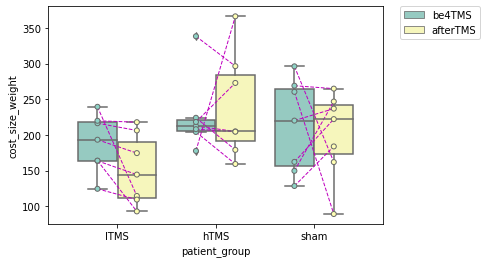

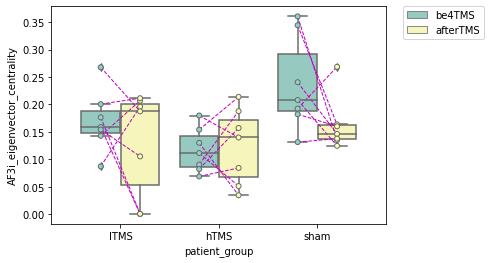

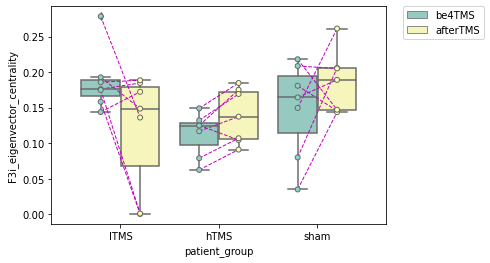

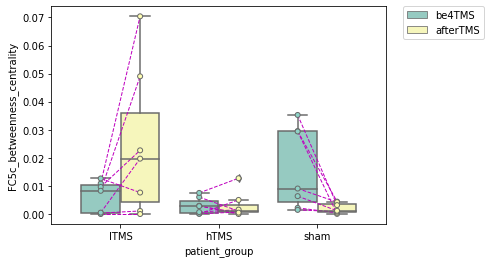

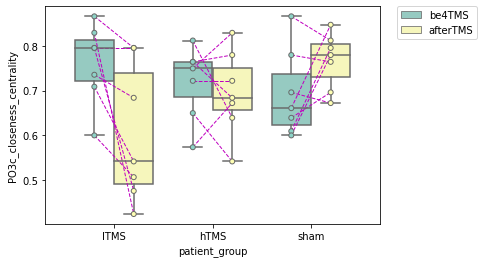

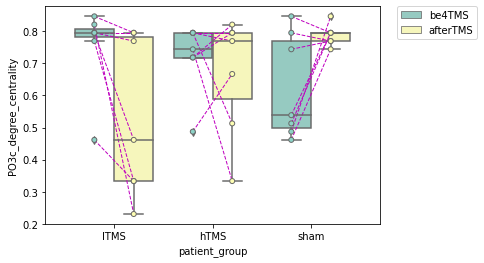

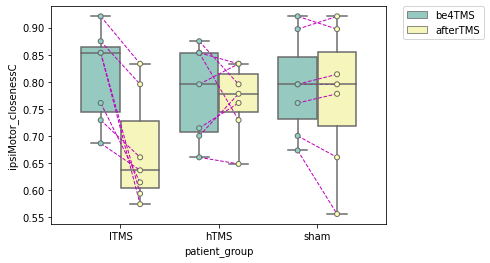

In [6]:
from bioinfokit.analys import stat
plt.rcParams.update({'figure.max_open_warning': 0})
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.expand_frame_repr', False)
gProperties= ['radius','diameter', 'density', 's_metric', 'transitivity', 'local_efficiency', 'global_efficiency',
                   'sw_omega', 'node_connectivity_wholeG','average_shortestPathLength_weight',
                   'wiener_idx', 'size','size_weight','assortativityCoefficient',
                   'cost_size_weight','cost_average_shortestP_length_weight',
                   'mean_clusteringC', 'g_cliqueNumber', 'g_numberOfMaxClique','non_randomness','relative_nonRandomness',
                   'wiener_idx_minST_weight', 'wiener_idx_maxST_weight','size_minST_weight','size_maxST_weight']
gProperties_local = ['eigenvector_centrality','closeness_centrality','degree_centrality','betweenness_centrality',
#                      'closeness_vitality',
#                      'ecc_weight','clusteringC_weight','cost_eigenvector_centrality_weight','closeness_centrality_weight','cost_closeness_vitality_weight'
                     'cost_betweenness_centrality_weight',
                     'cost_closeness_centrality_weight']
 
groups = ['ipsiH','contraH','forearm','arm','ipsiF','ipsiMotor','ipsiPO','mesial','contraF','contraMotor','contraPO']
gProperties_group = ['betweennessC','closenessC','degreeC','cost_betweennessC_weight','cost_closenessC_weight']
for ch in chs_list_image:
    gProperties+=[ch+'_'+gProperty_local for gProperty_local in gProperties_local]
for group in groups:
    gProperties+=[group+'_'+gProperty_group for gProperty_group in gProperties_group]

alpha=.05
bof_factor_ttest=3

gProperties_sigInt = []
gProperties_sigGroup = []
gProperties_sigSession = []
res = stat()
for gProperty in gProperties:
    res_var = gProperty
    df_push.loc[:,res_var]=df_push.loc[:,res_var].astype(float)
    aov = pg.mixed_anova(dv=res_var, within='session_group', between='patient_group', subject='subj_id', data=df_push)
    if aov['p-unc'].tolist()[2] < alpha: #interaction effect
        gProperties_sigInt.append(res_var)
        ### Tukey HSD
        hsd_be4 = pg.pairwise_tukey(data=df_push.query('session_group=="be4TMS"'),dv=res_var,between = 'patient_group')
        hsd_after = pg.pairwise_tukey(data=df_push.query('session_group=="afterTMS"'),dv=res_var,between = 'patient_group')


        ttest_session_lTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="lTMS"')).round(4)
        ttest_session_hTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                    subject='subj_id', data=df_push.query('patient_group=="hTMS"')).round(4)
        ttest_session_sham = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="sham"')).round(4)
        ttest_session_lTMS['p-unc'] =   ttest_session_lTMS['p-unc'] *bof_factor_ttest
        ttest_session_hTMS['p-unc'] =   ttest_session_hTMS['p-unc'] *bof_factor_ttest
        ttest_session_sham['p-unc'] =   ttest_session_sham['p-unc'] *bof_factor_ttest #three comparisons


#         try: 
#             if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any():
#                 gProperties_sigDiff_group.append(res_var)
        if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any() or (ttest_session_lTMS['p-unc']<alpha).any() or \
        (ttest_session_hTMS['p-unc']<alpha).any() or (ttest_session_sham['p-unc']<alpha).any():
            print('intE: ' + bold_color.BOLD+res_var+bold_color.END)
            print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_push,dv=res_var,group='session_group').loc['be4TMS','normal'],
                  pg.normality(data=df_push,dv=res_var,group='session_group').loc['afterTMS','normal']))
            print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_push,dv=res_var,
                                                                                                            group='patient_group').loc['lTMS','normal'],
                                                                                               pg.normality(data=df_push,dv=res_var,
                                                                                                            group='patient_group').loc['hTMS','normal'],
                                                                                              pg.normality(data=df_push,dv=res_var,
                                                                                                            group='patient_group').loc['sham','normal']))
            print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                group='session_group')['equal_var'].values[0],
                                                                            pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                group='patient_group')['equal_var'].values[0]))
            pg.print_table(aov,floatfmt='.4f')
            print('be4: across-conditions (tukey)')
            pg.print_table(hsd_be4,floatfmt='.4f')
            print('\n')
            print('after: across-conditions (tukey)')
            pg.print_table(hsd_after,floatfmt='.4f')
            print('\n')
            print('lTMS: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_lTMS,floatfmt='.4f')
            print('\n')
            print('hTMS: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_hTMS,floatfmt='.4f')
            print('\n')
            print('sham: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_sham,floatfmt='.4f')
            plt.figure()
            ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_push, palette="Set3") 
            stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_push,palette="Set3",linewidth=1,dodge=True,jitter=False)
            handles, labels = stplot.get_legend_handles_labels()
            l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            for i in range(3):
                plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                         [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',linewidth=1,c='m')

            fig = ax.get_figure()
            fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_push_bp.eps'))
            continue
    elif aov['p-unc'].tolist()[1] < alpha: #session effect
        gProperties_sigSession.append(res_var)
        ttest_session_lTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="lTMS"')).round(4)
        ttest_session_hTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                    subject='subj_id', data=df_push.query('patient_group=="hTMS"')).round(4)
        ttest_session_sham = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_push.query('patient_group=="sham"')).round(4)
        ttest_session_lTMS['p-unc'] =   ttest_session_lTMS['p-unc'] *bof_factor_ttest
        ttest_session_hTMS['p-unc'] =   ttest_session_hTMS['p-unc'] *bof_factor_ttest
        ttest_session_sham['p-unc'] =   ttest_session_sham['p-unc'] *bof_factor_ttest #three comparisons


        if (ttest_session_lTMS['p-unc']<alpha).any() or \
        (ttest_session_hTMS['p-unc']<alpha).any() or (ttest_session_sham['p-unc']<alpha).any():
            print('sessionE: ' + bold_color.BOLD+res_var+bold_color.END)
            print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_push,dv=res_var,group='session_group').loc['be4TMS','normal'],
                  pg.normality(data=df_push,dv=res_var,group='session_group').loc['afterTMS','normal']))
            print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_push,dv=res_var,
                                                                                                            group='patient_group').loc['lTMS','normal'],
                                                                                               pg.normality(data=df_push,dv=res_var,
                                                                                                            group='patient_group').loc['hTMS','normal'],
                                                                                              pg.normality(data=df_push,dv=res_var,
                                                                                                            group='patient_group').loc['sham','normal']))
            print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                group='session_group')['equal_var'].values[0],
                                                                            pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                group='patient_group')['equal_var'].values[0]))
            pg.print_table(aov,floatfmt='.4f')
            print('lTMS: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_lTMS,floatfmt='.4f')
            print('\n')
            print('hTMS: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_hTMS,floatfmt='.4f')
            print('\n')
            print('sham: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_sham,floatfmt='.4f')
            plt.figure()
            ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_push, palette="Set3") 
            stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_push,palette="Set3",linewidth=1,dodge=True,jitter=False)
            handles, labels = stplot.get_legend_handles_labels()
            l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            for i in range(3):
                plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                         [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',linewidth=1,c='m')

            fig = ax.get_figure()
            fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_push_bp.eps'))
            continue
    elif aov['p-unc'].tolist()[0] < alpha: #group effect
        gProperties_sigGroup.append(res_var)
        ### Tukey HSD
        hsd_be4 = pg.pairwise_tukey(data=df_push.query('session_group=="be4TMS"'),dv=res_var,between = 'patient_group')
        hsd_after = pg.pairwise_tukey(data=df_push.query('session_group=="afterTMS"'),dv=res_var,between = 'patient_group')

        if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any() :
            print('groupE: ' + bold_color.BOLD+res_var+bold_color.END)
            print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_push,dv=res_var,group='session_group').loc['be4TMS','normal'],
                  pg.normality(data=df_push,dv=res_var,group='session_group').loc['afterTMS','normal']))
            print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_push,dv=res_var,
                                                                                                            group='patient_group').loc['lTMS','normal'],
                                                                                               pg.normality(data=df_push,dv=res_var,
                                                                                                            group='patient_group').loc['hTMS','normal'],
                                                                                              pg.normality(data=df_push,dv=res_var,
                                                                                                            group='patient_group').loc['sham','normal']))
            print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                group='session_group')['equal_var'].values[0],
                                                                            pg.homoscedasticity(data=df_push,dv=res_var,
                                                                                                group='patient_group')['equal_var'].values[0]))
            pg.print_table(aov,floatfmt='.4f')
            print('be4: across-conditions (tukey)')
            pg.print_table(hsd_be4,floatfmt='.4f')
            print('\n')
            print('after: across-conditions (tukey)')
            pg.print_table(hsd_after,floatfmt='.4f')
            plt.figure()
            ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_push, palette="Set3") 
            stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_push,palette="Set3",linewidth=1,dodge=True,jitter=False)
            handles, labels = stplot.get_legend_handles_labels()
            l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            for i in range(3):
                plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                         [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',linewidth=1,c='m')

            fig = ax.get_figure()
            fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_push_bp.eps'))
    


## Section 3-5: Mixed ANOVA+Tukey+paired T-test -pull

In [24]:
from bioinfokit.analys import stat
import pingouin as pg
pd.set_option('display.expand_frame_repr', False)
n_chs = 40
bof_factor_ttest=3
alpha=.01
cons_sigDiff = []
cons_sigDiff_h_l_be4 = {}
cons_sigDiff_h_s_be4 = {}
cons_sigDiff_l_s_be4 = {}
con_sigDiff_be4 = [cons_sigDiff_h_l_be4,cons_sigDiff_h_s_be4,cons_sigDiff_l_s_be4] # must be this order
cons_sigDiff_h_l_after = {}
cons_sigDiff_h_s_after = {}
cons_sigDiff_l_s_after = {}
con_sigDiff_after = [cons_sigDiff_h_l_after,cons_sigDiff_h_s_after,cons_sigDiff_l_s_after]
lTMS_topo={}
hTMS_topo={}
sham_topo={}
res = stat()
for ch1_idx in range(n_chs):
    for ch2_idx in np.arange(ch1_idx+1,n_chs):
        ch1_name = chs_list_image[ch1_idx]
        ch2_name = chs_list_image[ch2_idx]
        res_var = 'SPMI_'+ch1_name+'_'+ch2_name
        aov = pg.mixed_anova(dv=res_var, within='session_group', between='patient_group', subject='subj_id', data=df_pull)
        if aov['p-unc'].tolist()[2] < alpha: #interaction effect
            cons_sigDiff.append('SPMI_'+ch1_name+'_'+ch2_name)
            ### Post-hocs
            hsd_be4 = pg.pairwise_tukey(data=df_pull.query('session_group=="be4TMS"'),dv=res_var,between = 'patient_group')
            hsd_after = pg.pairwise_tukey(data=df_pull.query('session_group=="afterTMS"'),dv=res_var,between = 'patient_group')
#             hsd_be4['p-tukey'] = hsd_be4['p-tukey']*2 #there are two comparisons
#             hsd_after['p-tukey'] = hsd_after['p-tukey']*2
            ttest_session_lTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="lTMS"')).round(4)
            ttest_session_hTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="hTMS"')).round(4)
            ttest_session_sham = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="sham"')).round(4)
            ttest_session_lTMS['p-unc'] =   ttest_session_lTMS['p-unc'] *bof_factor_ttest
            ttest_session_hTMS['p-unc'] =   ttest_session_hTMS['p-unc'] *bof_factor_ttest
            ttest_session_sham['p-unc'] =   ttest_session_sham['p-unc'] *bof_factor_ttest #three comparisons
            
            ### topograph of group effect
            for i in range(3):
                if hsd_be4['p-tukey'][i] < alpha:
                    con_sigDiff_be4 [i][res_var]=hsd_be4['hedges'][i].round(4)
                if hsd_after['p-tukey'][i] < alpha:
                    con_sigDiff_after [i][res_var]=hsd_after['hedges'][i].round(4)
            
            if ttest_session_lTMS['p-unc'].values < alpha:
                lTMS_topo[res_var]=ttest_session_lTMS['hedges'].values[0].round(4)
            if ttest_session_hTMS['p-unc'].values < alpha:
                hTMS_topo[res_var]=ttest_session_hTMS['hedges'].values[0].round(4)
            if ttest_session_sham['p-unc'].values < alpha:
                sham_topo[res_var]=ttest_session_sham['hedges'].values[0].round(4)
                
            if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any() or (ttest_session_lTMS['p-unc']<alpha).any() or \
            (ttest_session_hTMS['p-unc']<alpha).any() or (ttest_session_sham['p-unc']<alpha).any():
                print('intE: ' + bold_color.BOLD+res_var+bold_color.END)
                print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_pull,dv=res_var,
                                                                                               group='session_group').loc['be4TMS','normal'],
                      pg.normality(data=df_pull,dv=res_var,group='session_group').loc['afterTMS','normal']))
                print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_pull,dv=res_var,
                                                                                                                group='patient_group').loc['lTMS','normal'],
                                                                                                   pg.normality(data=df_pull,dv=res_var,
                                                                                                                group='patient_group').loc['hTMS','normal'],
                                                                                                  pg.normality(data=df_pull,dv=res_var,
                                                                                                                group='patient_group').loc['sham','normal']))
                print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                    group='session_group')['equal_var'].values[0],
                                                                                pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                    group='patient_group')['equal_var'].values[0]))
                pg.print_table(aov,floatfmt='.4f')
                print('be4: across-conditions (tukey)')
                pg.print_table(hsd_be4,floatfmt='.4f')
                print('\n')
                print('after: across-conditions (tukey)')
                pg.print_table(hsd_after,floatfmt='.4f')
                print('\n')
                print('lTMS: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_lTMS,floatfmt='.4f')
                print('\n')
                print('hTMS: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_hTMS,floatfmt='.4f')
                print('\n')
                print('sham: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_sham,floatfmt='.4f')
                plt.figure()
                ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_pull, palette="Set3") 
                
                stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_pull,palette="Set3",linewidth=1,dodge=True,jitter=False)
                handles, labels = stplot.get_legend_handles_labels()
                l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                for i in range(3):
                    plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                             [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',
                             linewidth=1,c='m')

                fig = ax.get_figure()
                fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_pull_bp.eps'))
                continue
        elif aov['p-unc'].tolist()[1] < alpha: #session effect
            cons_sigDiff.append('SPMI_'+ch1_name+'_'+ch2_name)
            ### Post-hocs
           
            ttest_session_lTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="lTMS"')).round(4)
            ttest_session_hTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="hTMS"')).round(4)
            ttest_session_sham = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="sham"')).round(4)
            ttest_session_lTMS['p-unc'] =   ttest_session_lTMS['p-unc'] *bof_factor_ttest
            ttest_session_hTMS['p-unc'] =   ttest_session_hTMS['p-unc'] *bof_factor_ttest
            ttest_session_sham['p-unc'] =   ttest_session_sham['p-unc'] *bof_factor_ttest #three comparisons
            if ttest_session_lTMS['p-unc'].values < alpha:
                lTMS_topo[res_var]=ttest_session_lTMS['hedges'].values[0].round(4)
            if ttest_session_hTMS['p-unc'].values < alpha:
                hTMS_topo[res_var]=ttest_session_hTMS['hedges'].values[0].round(4)
            if ttest_session_sham['p-unc'].values < alpha:
                sham_topo[res_var]=ttest_session_sham['hedges'].values[0].round(4)
                
            if (ttest_session_lTMS['p-unc']<alpha).any() or \
            (ttest_session_hTMS['p-unc']<alpha).any() or (ttest_session_sham['p-unc']<alpha).any():
                print('sessionE: ' + bold_color.BOLD+res_var+bold_color.END)
                print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_pull,dv=res_var,
                                                                                               group='session_group').loc['be4TMS','normal'],
                      pg.normality(data=df_pull,dv=res_var,group='session_group').loc['afterTMS','normal']))
                print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_pull,dv=res_var,
                                                                                                                group='patient_group').loc['lTMS','normal'],
                                                                                                   pg.normality(data=df_pull,dv=res_var,
                                                                                                                group='patient_group').loc['hTMS','normal'],
                                                                                                  pg.normality(data=df_pull,dv=res_var,
                                                                                                                group='patient_group').loc['sham','normal']))
                print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                    group='session_group')['equal_var'].values[0],
                                                                                pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                    group='patient_group')['equal_var'].values[0]))
                pg.print_table(aov,floatfmt='.4f')
                
                print('lTMS: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_lTMS,floatfmt='.4f')
                print('\n')
                print('hTMS: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_hTMS,floatfmt='.4f')
                print('\n')
                print('sham: after vs (-) be4 (paired ttest)')
                pg.print_table(ttest_session_sham,floatfmt='.4f')
                plt.figure()
                ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_pull, palette="Set3") 
                
                stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_pull,palette="Set3",linewidth=1,dodge=True,jitter=False)
                handles, labels = stplot.get_legend_handles_labels()
                l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                for i in range(3):
                    plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                             [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',
                             linewidth=1,c='m')

                fig = ax.get_figure()
                fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_pull_bp.eps'))
                continue
        elif aov['p-unc'].tolist()[0] < alpha: #group effect
            cons_sigDiff.append('SPMI_'+ch1_name+'_'+ch2_name)
            ### Post-hocs
            hsd_be4 = pg.pairwise_tukey(data=df_pull.query('session_group=="be4TMS"'),dv=res_var,between = 'patient_group')
            hsd_after = pg.pairwise_tukey(data=df_pull.query('session_group=="afterTMS"'),dv=res_var,between = 'patient_group')
#             hsd_be4['p-tukey'] = hsd_be4['p-tukey']*2 #there are two comparisons
#             hsd_after['p-tukey'] = hsd_after['p-tukey']*2
            
            ### topograph of group effect
            for i in range(3):
                if hsd_be4['p-tukey'][i] < alpha:
                    con_sigDiff_be4 [i][res_var]=hsd_be4['hedges'][i].round(4)
                if hsd_after['p-tukey'][i] < alpha:
                    con_sigDiff_after [i][res_var]=hsd_after['hedges'][i].round(4)
            
            
                
            if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any():
                print('groupE: ' + bold_color.BOLD+res_var+bold_color.END)
                print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_pull,dv=res_var,
                                                                                               group='session_group').loc['be4TMS','normal'],
                      pg.normality(data=df_pull,dv=res_var,group='session_group').loc['afterTMS','normal']))
                print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_pull,dv=res_var,
                                                                                                                group='patient_group').loc['lTMS','normal'],
                                                                                                   pg.normality(data=df_pull,dv=res_var,
                                                                                                                group='patient_group').loc['hTMS','normal'],
                                                                                                  pg.normality(data=df_pull,dv=res_var,
                                                                                                                group='patient_group').loc['sham','normal']))
                print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                    group='session_group')['equal_var'].values[0],
                                                                                pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                    group='patient_group')['equal_var'].values[0]))
                pg.print_table(aov,floatfmt='.4f')
                print('be4: across-conditions (tukey)')
                pg.print_table(hsd_be4,floatfmt='.4f')
                print('\n')
                print('after: across-conditions (tukey)')
                pg.print_table(hsd_after,floatfmt='.4f')
                
                plt.figure()
                ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_pull, palette="Set3") 
                
                stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_pull,palette="Set3",linewidth=1,dodge=True,jitter=False)
                handles, labels = stplot.get_legend_handles_labels()
                l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
                for i in range(3):
                    plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                             [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',
                             linewidth=1,c='m')

                fig = ax.get_figure()
                fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_pull_bp.eps'))
            


# group effect topograph
# topo_m4plot = None
for topo_group in con_sigDiff_be4:
    topo_m = np.zeros([n_chs,n_chs])
    for topo_SPMI in topo_group.keys():
        ch1_name = topo_SPMI.split('_')[1]
        ch2_name = topo_SPMI.split('_')[2]
        ch1_idx = chs_list_image.index(ch1_name)
        ch2_idx = chs_list_image.index(ch2_name)
        topo_m[ch1_idx,ch2_idx]= topo_group[topo_SPMI]        
    if topo_m.any() == False:
        continue
    if topo_m4plot is None:
        topo_m4plot = topo_m
    fig,ax = plt.subplots(figsize=(14, 8))
    ax = plt.gca()
    ax = plotTopoEMG(EMGs,ax)
    ax = plotTopoEEG(EEGs,ax)
    ax.set_xlim([-12,12])
    ax.set_ylim([-8,8])
    fig,ax = graph_plot_fixMapper(topo_m,topo_m4plot,fig,ax)
    if topo_group == cons_sigDiff_h_l_be4:
        ax.set_title('preTMS group effect (hTMS-lTMS)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_h_lbe4_topo_pull.eps'))
    elif topo_group == cons_sigDiff_h_s_be4:
        ax.set_title('preTMS group effect (hTMS-sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_h_sbe4_topo_pull.eps'))
    else:
        ax.set_title('preTMS group effect (lTMS-sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_l_sbe4_topo_pull.eps'))
      

for topo_group in con_sigDiff_after:
    topo_m = np.zeros([n_chs,n_chs])
    for topo_SPMI in topo_group.keys():
        ch1_name = topo_SPMI.split('_')[1]
        ch2_name = topo_SPMI.split('_')[2]
        ch1_idx = chs_list_image.index(ch1_name)
        ch2_idx = chs_list_image.index(ch2_name)
        topo_m[ch1_idx,ch2_idx]= topo_group[topo_SPMI]    
    if topo_m.any() == False:
        continue
    if topo_m4plot is None:
        topo_m4plot = topo_m
    fig,ax = plt.subplots(figsize=(14, 8))
    ax = plt.gca()
    ax = plotTopoEMG(EMGs,ax)
    ax = plotTopoEEG(EEGs,ax)
    ax.set_xlim([-12,12])
    ax.set_ylim([-8,8])
    fig,ax = graph_plot_fixMapper(topo_m,topo_m4plot,fig,ax)
    if topo_group == cons_sigDiff_h_l_after:
        ax.set_title('postTMS group effect (hTMS-lTMS)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_h_lafter_topo_pull.eps'))
    elif topo_group == cons_sigDiff_h_s_after:
        ax.set_title('postTMS group effect (hTMS-sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_h_safter_topo_pull.eps'))
    else:
        ax.set_title('postTMS group effect (lTMS-sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'groupE_l_safter_topo_pull.eps'))

topo_groups = [hTMS_topo, sham_topo,lTMS_topo]
for topo_group in topo_groups:
    topo_m = np.zeros([n_chs,n_chs])
    for topo_SPMI in topo_group.keys():
        ch1_name = topo_SPMI.split('_')[1]
        ch2_name = topo_SPMI.split('_')[2]
        ch1_idx = chs_list_image.index(ch1_name)
        ch2_idx = chs_list_image.index(ch2_name)
        topo_m[ch1_idx,ch2_idx]= topo_group[topo_SPMI]
    if topo_m.any() == False:
        continue
    if topo_m4plot is None:
        topo_m4plot = topo_m
    fig,ax = plt.subplots(figsize=(14, 8))
    ax = plt.gca()
    ax = plotTopoEMG(EMGs,ax)
    ax = plotTopoEEG(EEGs,ax)
    ax.set_xlim([-12,12])
    ax.set_ylim([-8,8])
    fig,ax = graph_plot_fixMapper(topo_m,topo_m4plot,fig,ax)
    if topo_group == lTMS_topo:
        ax.set_title('session effect (lTMS)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'lTMS_topo_pull.eps'))
    elif topo_group == hTMS_topo:
        ax.set_title('session effect (hTMS)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'hTMS_topo_pull.eps'))
    else:
        ax.set_title('session effect (sham)')
        fig.savefig(os.path.join(iVC_TMS_results_dir,'sham_topo_pull.eps'))
        

## Section 3-7: ANOVA+tukey+pairedTtest - gProperties - pull

In [26]:
from bioinfokit.analys import stat
plt.rcParams.update({'figure.max_open_warning': 0})
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.expand_frame_repr', False)
gProperties= ['radius','diameter', 'density', 's_metric', 'transitivity', 'local_efficiency', 'global_efficiency',
                   'sw_omega', 'node_connectivity_wholeG','average_shortestPathLength_weight',
                   'wiener_idx', 'size','size_weight','assortativityCoefficient',
                   'cost_size_weight','cost_average_shortestP_length_weight',
                   'mean_clusteringC', 'g_cliqueNumber', 'g_numberOfMaxClique','non_randomness','relative_nonRandomness',
                   'wiener_idx_minST_weight', 'wiener_idx_maxST_weight','size_minST_weight','size_maxST_weight']
gProperties_local = ['eigenvector_centrality','closeness_centrality','degree_centrality','betweenness_centrality',
#                      'closeness_vitality',
#                      'ecc_weight','clusteringC_weight','cost_eigenvector_centrality_weight','closeness_centrality_weight','cost_closeness_vitality_weight'
                     'cost_betweenness_centrality_weight',
                     'cost_closeness_centrality_weight']
 
groups = ['ipsiH','contraH','forearm','arm','ipsiF','ipsiMotor','ipsiPO','mesial','contraF','contraMotor','contraPO']
gProperties_group = ['betweennessC','closenessC','degreeC','cost_betweennessC_weight','cost_closenessC_weight']
for ch in chs_list_image:
    gProperties+=[ch+'_'+gProperty_local for gProperty_local in gProperties_local]
for group in groups:
    gProperties+=[group+'_'+gProperty_group for gProperty_group in gProperties_group]
alpha=.01
bof_factor_ttest=3

gProperties_sigInt = []
gProperties_sigGroup = []
gProperties_sigSession = []
res = stat()
for gProperty in gProperties:
    res_var = gProperty
    df_pull.loc[:,res_var]=df_pull.loc[:,res_var].astype(float)
    aov = pg.mixed_anova(dv=res_var, within='session_group', between='patient_group', subject='subj_id', data=df_pull)
    if aov['p-unc'].tolist()[2] < alpha: #interaction effect
        gProperties_sigInt.append(res_var)
        ### Tukey HSD
        hsd_be4 = pg.pairwise_tukey(data=df_pull.query('session_group=="be4TMS"'),dv=res_var,between = 'patient_group')
        hsd_after = pg.pairwise_tukey(data=df_pull.query('session_group=="afterTMS"'),dv=res_var,between = 'patient_group')


        ttest_session_lTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="lTMS"')).round(4)
        ttest_session_hTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                    subject='subj_id', data=df_pull.query('patient_group=="hTMS"')).round(4)
        ttest_session_sham = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="sham"')).round(4)
        ttest_session_lTMS['p-unc'] =   ttest_session_lTMS['p-unc'] *bof_factor_ttest
        ttest_session_hTMS['p-unc'] =   ttest_session_hTMS['p-unc'] *bof_factor_ttest
        ttest_session_sham['p-unc'] =   ttest_session_sham['p-unc'] *bof_factor_ttest #three comparisons


#         try: 
#             if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any():
#                 gProperties_sigDiff_group.append(res_var)
        if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any() or (ttest_session_lTMS['p-unc']<alpha).any() or \
        (ttest_session_hTMS['p-unc']<alpha).any() or (ttest_session_sham['p-unc']<alpha).any():
            print('intE: ' + bold_color.BOLD+res_var+bold_color.END)
            print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_pull,dv=res_var,group='session_group').loc['be4TMS','normal'],
                  pg.normality(data=df_pull,dv=res_var,group='session_group').loc['afterTMS','normal']))
            print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_pull,dv=res_var,
                                                                                                            group='patient_group').loc['lTMS','normal'],
                                                                                               pg.normality(data=df_pull,dv=res_var,
                                                                                                            group='patient_group').loc['hTMS','normal'],
                                                                                              pg.normality(data=df_pull,dv=res_var,
                                                                                                            group='patient_group').loc['sham','normal']))
            print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                group='session_group')['equal_var'].values[0],
                                                                            pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                group='patient_group')['equal_var'].values[0]))
            pg.print_table(aov,floatfmt='.4f')
            print('be4: across-conditions (tukey)')
            pg.print_table(hsd_be4,floatfmt='.4f')
            print('\n')
            print('after: across-conditions (tukey)')
            pg.print_table(hsd_after,floatfmt='.4f')
            print('\n')
            print('lTMS: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_lTMS,floatfmt='.4f')
            print('\n')
            print('hTMS: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_hTMS,floatfmt='.4f')
            print('\n')
            print('sham: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_sham,floatfmt='.4f')
            plt.figure()
            ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_pull, palette="Set3") 
            stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_pull,palette="Set3",linewidth=1,dodge=True,jitter=False)
            handles, labels = stplot.get_legend_handles_labels()
            l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            for i in range(3):
                plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                         [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',linewidth=1,c='m')

            fig = ax.get_figure()
            fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_pull_bp.eps'))
            continue
    elif aov['p-unc'].tolist()[1] < alpha: #session effect
        gProperties_sigSession.append(res_var)
        ttest_session_lTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="lTMS"')).round(4)
        ttest_session_hTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                    subject='subj_id', data=df_pull.query('patient_group=="hTMS"')).round(4)
        ttest_session_sham = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                        subject='subj_id', data=df_pull.query('patient_group=="sham"')).round(4)
        ttest_session_lTMS['p-unc'] =   ttest_session_lTMS['p-unc'] *bof_factor_ttest
        ttest_session_hTMS['p-unc'] =   ttest_session_hTMS['p-unc'] *bof_factor_ttest
        ttest_session_sham['p-unc'] =   ttest_session_sham['p-unc'] *bof_factor_ttest #three comparisons


        if (ttest_session_lTMS['p-unc']<alpha).any() or \
        (ttest_session_hTMS['p-unc']<alpha).any() or (ttest_session_sham['p-unc']<alpha).any():
            print('sessionE: ' + bold_color.BOLD+res_var+bold_color.END)
            print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_pull,dv=res_var,group='session_group').loc['be4TMS','normal'],
                  pg.normality(data=df_pull,dv=res_var,group='session_group').loc['afterTMS','normal']))
            print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_pull,dv=res_var,
                                                                                                            group='patient_group').loc['lTMS','normal'],
                                                                                               pg.normality(data=df_pull,dv=res_var,
                                                                                                            group='patient_group').loc['hTMS','normal'],
                                                                                              pg.normality(data=df_pull,dv=res_var,
                                                                                                            group='patient_group').loc['sham','normal']))
            print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                group='session_group')['equal_var'].values[0],
                                                                            pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                group='patient_group')['equal_var'].values[0]))
            pg.print_table(aov,floatfmt='.4f')
            print('lTMS: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_lTMS,floatfmt='.4f')
            print('\n')
            print('hTMS: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_hTMS,floatfmt='.4f')
            print('\n')
            print('sham: after vs (-) be4 (paired ttest)')
            pg.print_table(ttest_session_sham,floatfmt='.4f')
            plt.figure()
            ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_pull, palette="Set3") 
            stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_pull,palette="Set3",linewidth=1,dodge=True,jitter=False)
            handles, labels = stplot.get_legend_handles_labels()
            l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            for i in range(3):
                plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                         [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',linewidth=1,c='m')

            fig = ax.get_figure()
            fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_pull_bp.eps'))
            continue
    elif aov['p-unc'].tolist()[0] < alpha: #group effect
        gProperties_sigGroup.append(res_var)
        ### Tukey HSD
        hsd_be4 = pg.pairwise_tukey(data=df_pull.query('session_group=="be4TMS"'),dv=res_var,between = 'patient_group')
        hsd_after = pg.pairwise_tukey(data=df_pull.query('session_group=="afterTMS"'),dv=res_var,between = 'patient_group')

        if (hsd_be4['p-tukey']<alpha).any() or (hsd_after['p-tukey']<alpha).any() :
            print('groupE: ' + bold_color.BOLD+res_var+bold_color.END)
            print('Normality - be4TMS: {0}, Normality - afterTMS: {1}'.format(pg.normality(data=df_pull,dv=res_var,group='session_group').loc['be4TMS','normal'],
                  pg.normality(data=df_pull,dv=res_var,group='session_group').loc['afterTMS','normal']))
            print('Normality - lTMS: {0}, Normality - hTMS: {1}, Normality - sham: {2}'.format(pg.normality(data=df_pull,dv=res_var,
                                                                                                            group='patient_group').loc['lTMS','normal'],
                                                                                               pg.normality(data=df_pull,dv=res_var,
                                                                                                            group='patient_group').loc['hTMS','normal'],
                                                                                              pg.normality(data=df_pull,dv=res_var,
                                                                                                            group='patient_group').loc['sham','normal']))
            print('Homogeneity - session_group: {0}, Homogeneity - patient_group: {1}'.format(pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                group='session_group')['equal_var'].values[0],
                                                                            pg.homoscedasticity(data=df_pull,dv=res_var,
                                                                                                group='patient_group')['equal_var'].values[0]))
            pg.print_table(aov,floatfmt='.4f')
            print('be4: across-conditions (tukey)')
            pg.print_table(hsd_be4,floatfmt='.4f')
            print('\n')
            print('after: across-conditions (tukey)')
            pg.print_table(hsd_after,floatfmt='.4f')
            plt.figure()
            ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=df_pull, palette="Set3") 
            stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=df_pull,palette="Set3",linewidth=1,dodge=True,jitter=False)
            handles, labels = stplot.get_legend_handles_labels()
            l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
            for i in range(3):
                plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
                         [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',linewidth=1,c='m')

            fig = ax.get_figure()
            fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_pull_bp.eps'))
    


## Optional: have a close look at a variable


ANOVA SUMMARY

Source               SS    DF1    DF2       MS       F    p-unc     np2       eps
-------------  --------  -----  -----  -------  ------  -------  ------  --------
patient_group    1.6956      2     18   0.8478  0.0416   0.9594  0.0046  nan
session_group    1.0266      1     18   1.0266  0.0555   0.8164  0.0031    1.0000
Interaction    143.9203      2     18  71.9601  3.8917   0.0394  0.3019  nan

be4: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
----  ----  ---------  ---------  -------  ------  -------  ---------  --------
hTMS  lTMS     7.3253     2.5210   4.8043  1.8023   2.6656     0.0398    1.3339
hTMS  sham     7.3253     4.0432   3.2821  1.8023   1.8210     0.1910    0.9112
lTMS  sham     2.5210     4.0432  -1.5222  1.8023  -0.8446     0.6712   -0.4226



after: across-conditions (tukey)

POST HOC TESTS

A     B       mean(A)    mean(B)     diff      se        T    p-tukey    hedges
--

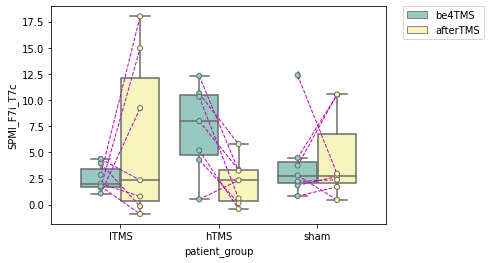

In [25]:
res_var = 'SPMI_F7i_T7c'
data = df_push #or df_pull
data.loc[:,res_var]=data.loc[:,res_var].astype(float)
import pingouin as pg
bof_factor_ttest=3

# #Violin Plot
# plt.figure()
# sns.violinplot(data=df_push, x="patient_group", y=res_var, hue="session_group",
#                split=True, inner="quart", linewidth=1,
#                palette='Set3')
# ###########
ax = sns.boxplot(x="patient_group", y=res_var, hue="session_group", data=data, palette="Set3") 
stplot = sns.stripplot(x="patient_group", y=res_var, hue="session_group", data=data,palette="Set3",linewidth=1,dodge=True,jitter=False)
for i in range(3):
    plt.plot([stplot.collections[2*i].get_offsets().data[:,0].tolist(),stplot.collections[2*i+1].get_offsets().data[:,0].tolist()],
             [stplot.collections[2*i].get_offsets().data[:,1].tolist(),stplot.collections[2*i+1].get_offsets().data[:,1].tolist()],'--',linewidth=1,c='m')
aov = pg.mixed_anova(dv=res_var, within='session_group', between='patient_group', subject='subj_id', data=data)
handles, labels = stplot.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# if saving bp is what you wanted, uncomment those lines
# ax.set_ylim([-2.5,1.5])
# fig = ax.get_figure()
# fig.savefig(os.path.join(iVC_TMS_results_dir,res_var+'_mANOVA_push_bp.eps'))

#  paired points boxplot 
# plt.figure()
# n=1
# for group in patient_groups.keys():
#     plt.scatter(n*np.ones(len(patient_groups[group])),df_push[df_push['patient_group']==group].query('session_group=="be4TMS"')[res_var])
#     plt.scatter((n+1)*np.ones(len(patient_groups[group])),df_push[df_push['patient_group']==group].query('session_group=="afterTMS"')[res_var])
#     plt.plot([n,n+1],[df_push[df_push['patient_group']==group].query('session_group=="be4TMS"')[res_var],
#                 df_push[df_push['patient_group']==group].query('session_group=="afterTMS"')[res_var]],c='k')
#     n+=2

hsd_be4 = pg.pairwise_tukey(data=data.query('session_group=="be4TMS"'),dv=res_var,between = 'patient_group')
hsd_after = pg.pairwise_tukey(data=data.query('session_group=="afterTMS"'),dv=res_var,between = 'patient_group')


ttest_session_lTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                subject='subj_id', data=data.query('patient_group=="lTMS"')).round(4)
ttest_session_hTMS = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                            subject='subj_id', data=data.query('patient_group=="hTMS"')).round(4)
ttest_session_sham = pg.pairwise_ttests(dv=res_var, within = 'session_group', 
                                                subject='subj_id', data=data.query('patient_group=="sham"')).round(4)
ttest_session_lTMS['p-unc'] =   ttest_session_lTMS['p-unc'] *bof_factor_ttest
ttest_session_hTMS['p-unc'] =   ttest_session_hTMS['p-unc'] *bof_factor_ttest
ttest_session_sham['p-unc'] =   ttest_session_sham['p-unc'] *bof_factor_ttest #three comparisons

pg.print_table(aov,floatfmt='.4f')
print('be4: across-conditions (tukey)')
pg.print_table(hsd_be4,floatfmt='.4f')
print('\n')
print('after: across-conditions (tukey)')
pg.print_table(hsd_after,floatfmt='.4f')
print('\n')
print('lTMS: after vs (-) be4 (paired ttest)')
pg.print_table(ttest_session_lTMS,floatfmt='.4f')
print('\n')
print('hTMS: after vs (-) be4 (paired ttest)')
pg.print_table(ttest_session_hTMS,floatfmt='.4f')
print('\n')
print('sham: after vs (-) be4 (paired ttest)')
pg.print_table(ttest_session_sham,floatfmt='.4f')

# Summary: gP that are under consideration:
- closenessC (cost_weight)
- betweennessC (cost_weight)
- eigenvectorC (correlate with degreeC)
- ecc_weight
- closenessV (cost_weight)